# Import Libraries and read file

In [252]:
import matplotlib.pyplot as plt
import astropy
import yt
import numpy as np
import os 
from matplotlib.patches import Rectangle

# elephant
hdf5_root = "/srv/data/stratbox_simulations/stratbox_particle_runs/bx5/smd132/sn34/pe300/4pc_resume/4pc"

# s01.leaves
# hdf5_root = "/home/joy0921/Desktop/Dataset/hdf5_files"

ds = yt.load(os.path.join(hdf5_root, 'sn34_smd132_bx5_pe300_hdf5_plt_cnt_0206'))

center = [0, 0, 0] * yt.units.pc
arb_center = ds.arr(center, 'code_length')
xlim = 256
ylim = 256
zlim= 256
left_edge = arb_center + ds.quan(-500, 'pc')
right_edge = arb_center + ds.quan(500, 'pc')
obj = ds.arbitrary_grid(left_edge, right_edge, dims=(256,256,256))

yt : [INFO     ] 2024-03-15 12:03:29,898 Particle file found: sn34_smd132_bx5_pe300_hdf5_part_0206


yt : [INFO     ] 2024-03-15 12:03:29,970 Parameters: current_time              = 6046479403795140.0
yt : [INFO     ] 2024-03-15 12:03:29,972 Parameters: domain_dimensions         = [  32   32 1280]
yt : [INFO     ] 2024-03-15 12:03:29,973 Parameters: domain_left_edge          = [-1.54283879e+21 -1.54283879e+21 -6.17135516e+22]
yt : [INFO     ] 2024-03-15 12:03:29,974 Parameters: domain_right_edge         = [1.54283879e+21 1.54283879e+21 6.17135516e+22]
yt : [INFO     ] 2024-03-15 12:03:29,975 Parameters: cosmological_simulation   = 0


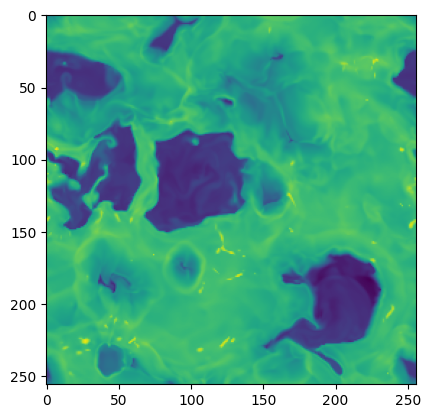

In [274]:
plt.imshow(np.log10(obj['flash', 'dens'][:, :, 104].T[::-1])) 
plt.savefig("whole_grid.png")

In [49]:
center_1000 = [0, 0, 0] * yt.units.pc
arb_center_1000 = ds.arr(center_1000, 'code_length')
xlim_1000 = 1000
ylim_1000 = 1000
zlim_1000 = 1000
left_edge_1000 = arb_center_1000 - ds.quan(xlim_1000 // 2, 'pc')
right_edge_1000 = arb_center_1000 + ds.quan(ylim_1000 // 2, 'pc')
obj_1000 = ds.arbitrary_grid(left_edge_1000, right_edge_1000, dims=[xlim_1000, ylim_1000, zlim_1000])

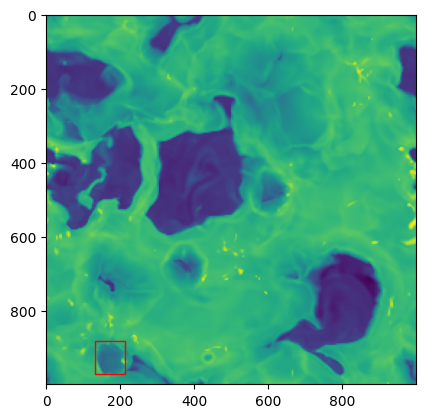

In [73]:
plt.imshow(np.log10(obj_1000['flash', 'dens'][:, :, 419].T[::-1]))      # slice: z = -91 pc
plt.gca().add_patch(Rectangle((-368 + 500, -(-382) + 500), 80, 90, linewidth=1, edgecolor='r', facecolor="none"))     

In [253]:
def get_velz_dens(x_range, y_range, z_range):
    # read a 3D grid of velz and density array
    velz = obj["flash", "velz"][x_range[0] : x_range[1], y_range[0] : y_range[1], z_range[0] : z_range[1]].to('km/s').value        
    dens = obj["flash", "dens"][x_range[0] : x_range[1], y_range[0] : y_range[1], z_range[0] : z_range[1]].to('g/cm**3').value          

    print(f"obj.shape: {obj['flash', 'velz'].shape}")
    print("x, y, z ranges: ", x_range, y_range, z_range)
    print(f"velz.shape: {velz.shape}\tdens.shape: {dens.shape}\n\n")      
     

    dz = obj['flash', 'dz'][x_range[0] : x_range[1], y_range[0] : y_range[1], z_range[0] : z_range[1]].to('cm').value
    mp = yt.physical_constants.mp.value # proton mass

    # calculate the density as column density
    coldens = dens * dz / (1.4 * mp)

    return velz, coldens

In [254]:
low_x0, low_y0, low_w, low_h, bottom_z, top_z = -500, -500, 1000, 1000, -500, 500

def pc2pixel(coord, x_y_z):
    if x_y_z == "x":
        return coord + top_z
    elif x_y_z == "y":
        return top_z - coord
    elif x_y_z == "z":
        return coord + top_z
    return coord

In [294]:
x_range, y_range, z_range = (pc2pixel(-428, x_y_z = 'x'), pc2pixel(-228, x_y_z = 'x')), (0, 200), (pc2pixel(-136, x_y_z = 'z'), pc2pixel(34, x_y_z = 'z'))

x_range, y_range, z_range 



((72, 272), (0, 200), (364, 534))

# Input cube coordinates, read dens values

In [295]:
# x_range, y_range, z_range = (-468, -188), (-572, -282), (-136, 34) #(-368, -288), (-418, -328), (-250, 250)  #(-136, 34) 

multiplier = 256 / 1000

# Multiply each element within the tuples by the multiplier
x_range_scaled = tuple(int(x * multiplier) for x in x_range)
y_range_scaled = tuple(int(y * multiplier) for y in y_range)
#z_range_scaled = z_range  
z_range_scaled = tuple(int(z * multiplier) for z in z_range)

new_velz, new_dens = get_velz_dens(x_range_scaled, y_range_scaled, z_range_scaled)

obj.shape: (256, 256, 256)
x, y, z ranges:  (18, 69) (0, 51) (93, 136)
velz.shape: (51, 51, 43)	dens.shape: (51, 51, 43)




In [271]:
z = pc2pixel(-91, x_y_z='z') * 256 / 1000 - z_range_scaled[0]
z

11.703999999999994

## Confirm Velocity and Density readings

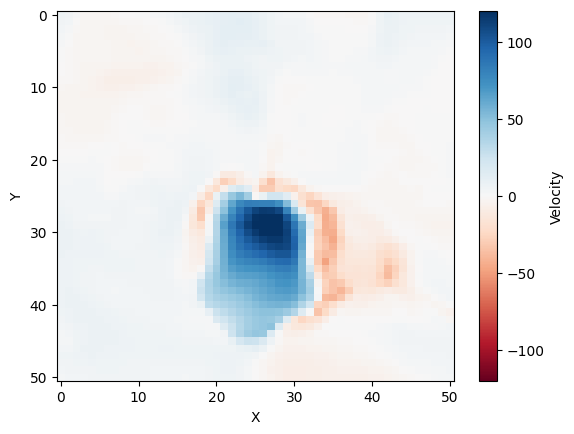

In [318]:
# Velosity slice

fig, ax = plt.subplots()
im = ax.imshow((new_velz[:, :, 11].T[::-1]), cmap='RdBu', aspect='auto', vmin=-120,vmax=120)
fig.colorbar(im, label='Velocity')
plt.xlabel('X')
plt.ylabel('Y')
fig.savefig('channel_maps/velz_zoom_in.png')
plt.show()


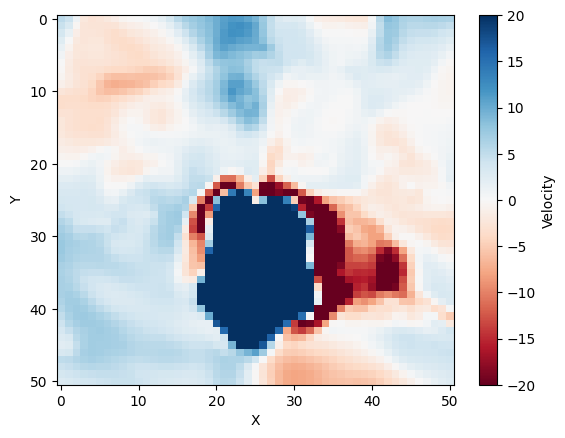

In [319]:
# Velocity slice, value scaled
fig, ax = plt.subplots()
im = ax.imshow((new_velz[:, :, 11].T[::-1]), cmap='RdBu', aspect='auto', vmin=-20,vmax=20)
fig.colorbar(im, label='Velocity')
plt.xlabel('X')
plt.ylabel('Y')
fig.savefig('channel_maps/velz_zoom_in_vzoom.png')
plt.show()


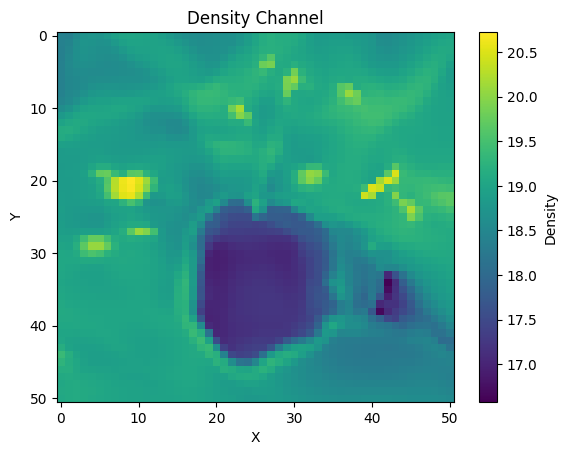

In [305]:
# Density zoom in

fig, ax = plt.subplots()
im = ax.imshow(np.log10(new_dens[:, :, 11].T[::-1]), cmap='viridis', aspect='auto')
fig.colorbar(im, label='Density')
plt.title('Density Channel')
plt.xlabel('X')
plt.ylabel('Y')
fig.savefig('channel_maps/density_zoom_in.png')
plt.show()


## Channel Map generation

In [331]:
# convert velz and dens to numpy array
velz_np = np.array(new_velz)
dens_np = np.array(new_dens)


# Filter the velz and dens arrays
velz_range = (2.5, 3.5) #(2.5, 2.75), (3.1, 3.5), (4.5, 4.9)
mask = (velz_np >= velz_range[0]) & (velz_np <= velz_range[1])
filtered_dens = np.where(mask, dens_np, 1) #dens_np[mask]

print(f"filtered_dens.shape: {filtered_dens.shape}\n")

mean_filtered_dens = np.nansum(filtered_dens, axis=-1)
print(f"mean size: {mean_filtered_dens.shape}")



filtered_dens.shape: (51, 51, 43)

mean size: (51, 51)


Text(0, 0.5, 'Y')

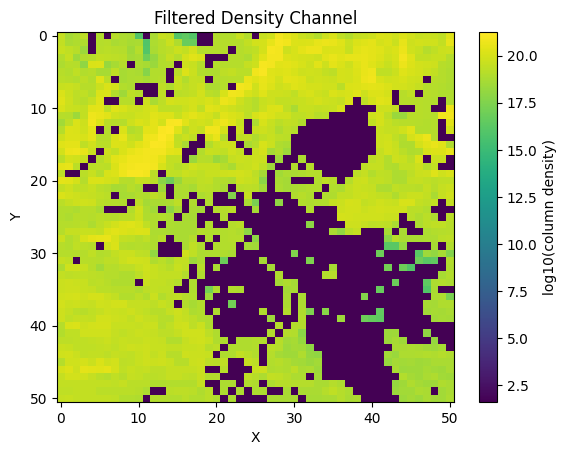

In [301]:
# Channel image
fig, ax = plt.subplots()
im = ax.imshow(np.log10(mean_filtered_dens.T[::-1]), cmap='viridis', aspect='auto')
fig.colorbar(im, label='log10(column density)')
plt.title('Filtered Density Channel')
plt.xlabel('X')
plt.ylabel('Y')
#fig.savefig('channel_maps/channel_image_49.png')

/tmp/ipykernel_1612060/3796917530.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


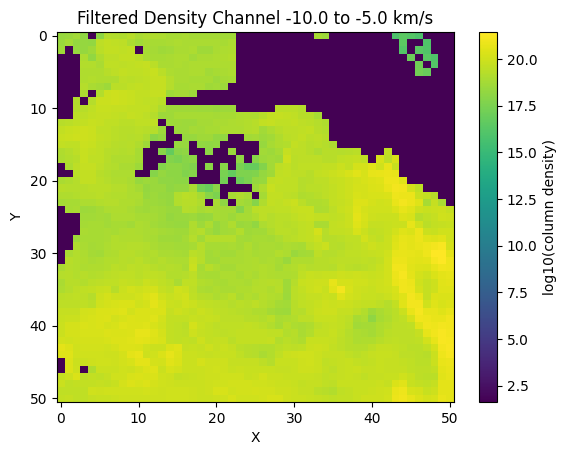

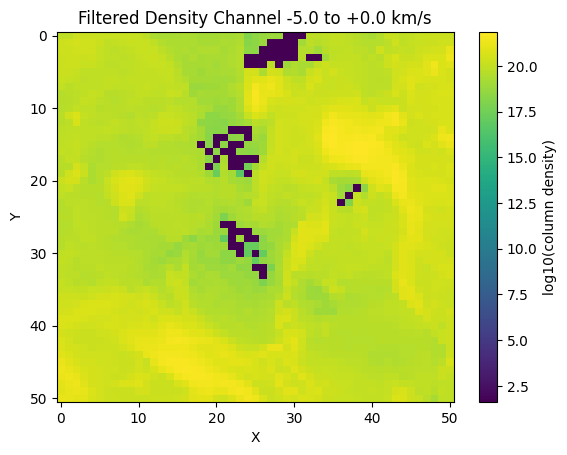

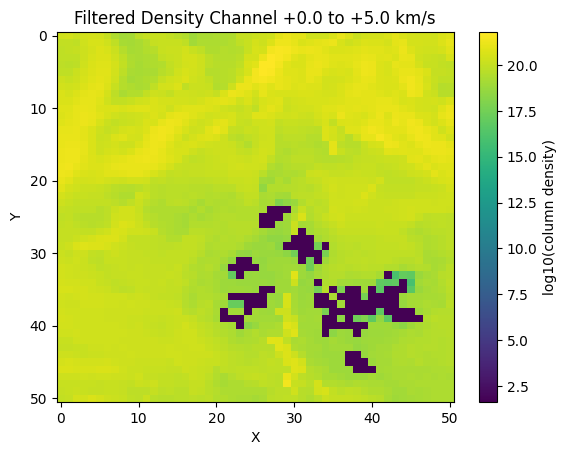

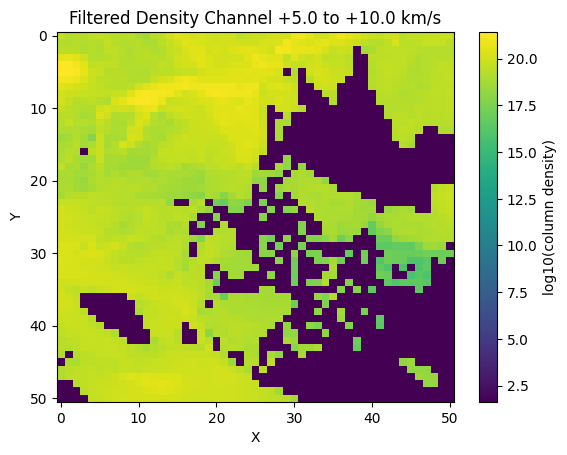

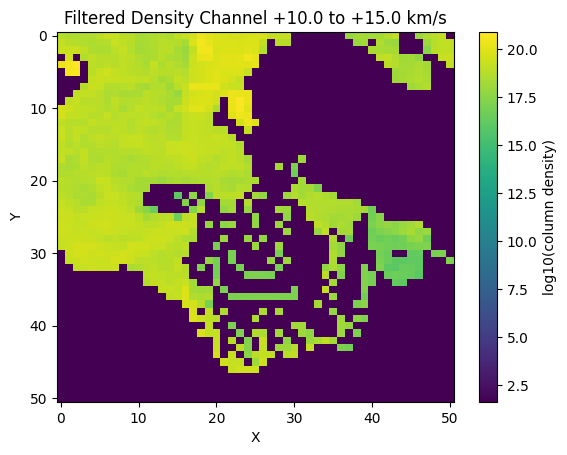

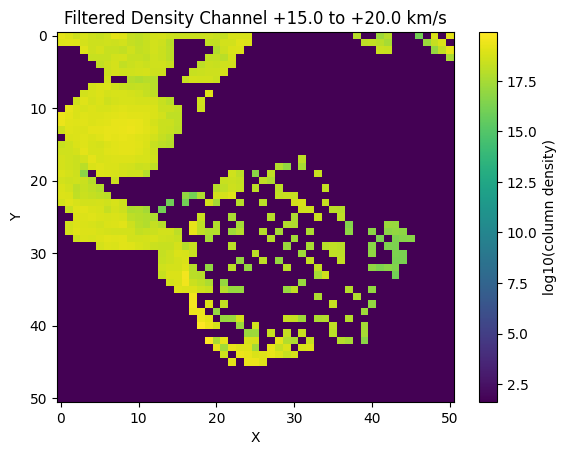

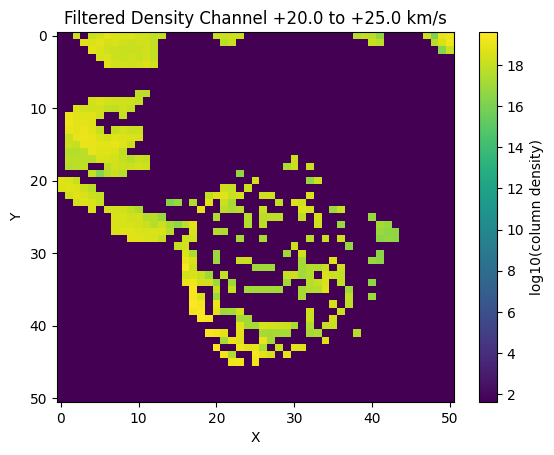

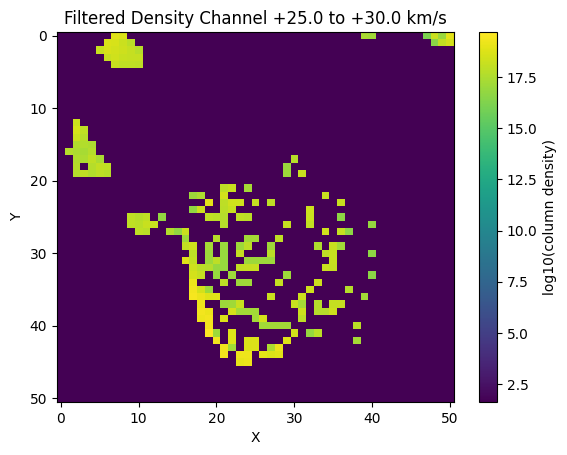

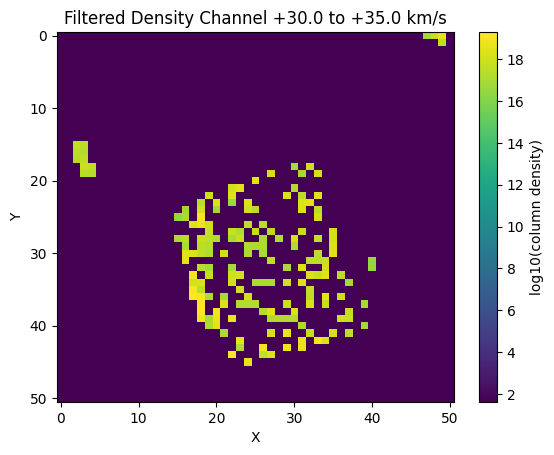

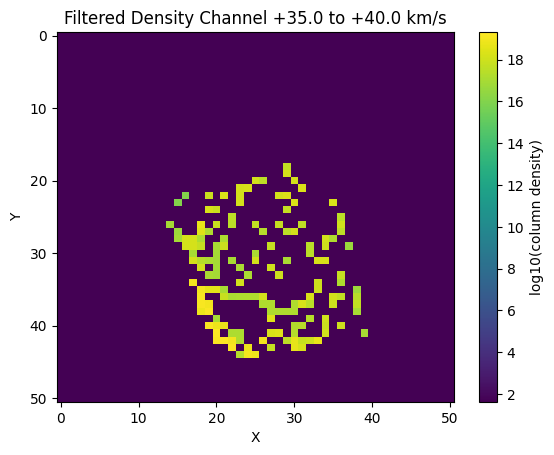

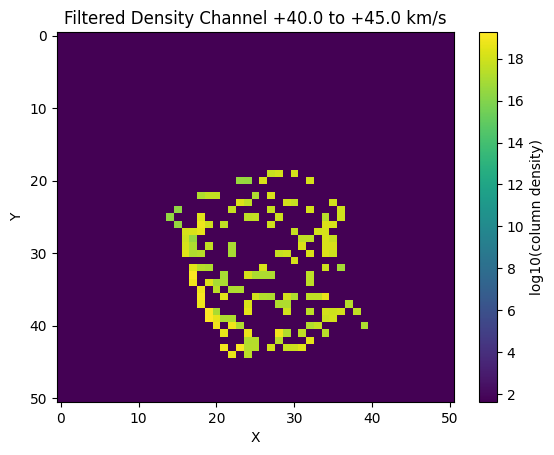

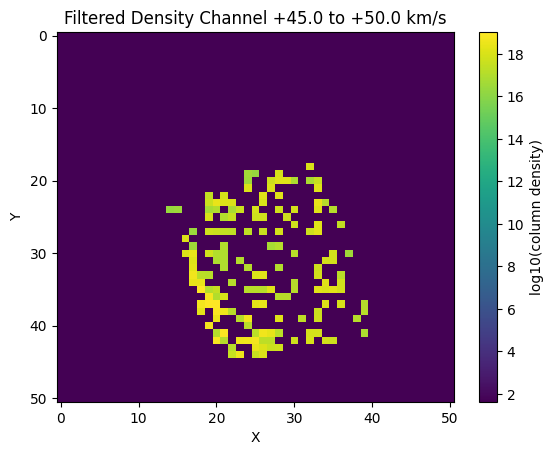

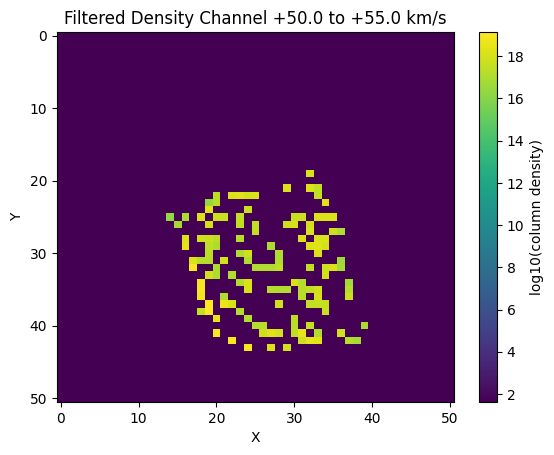

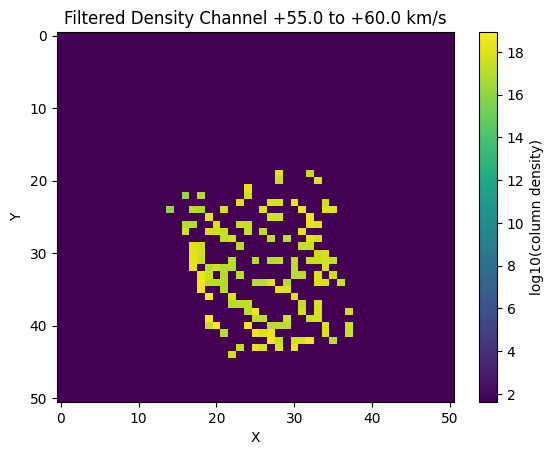

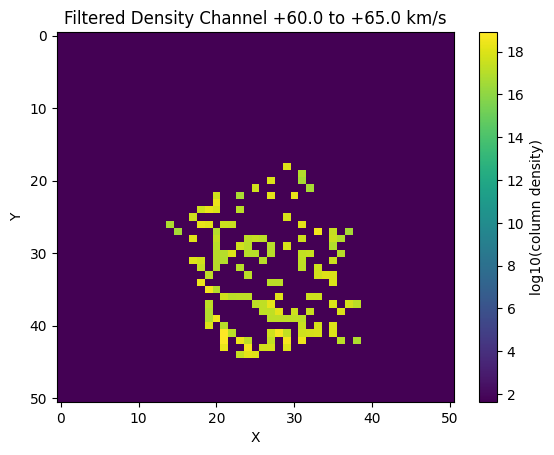

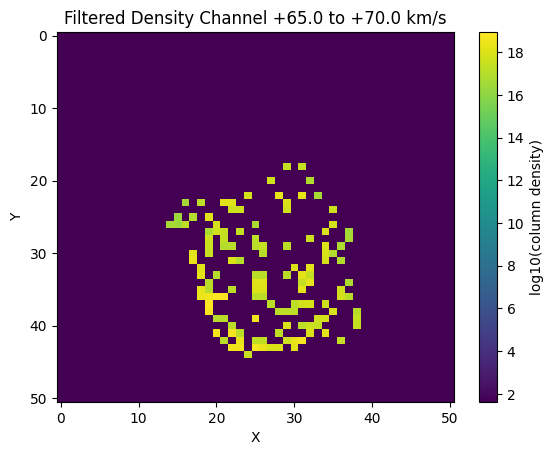

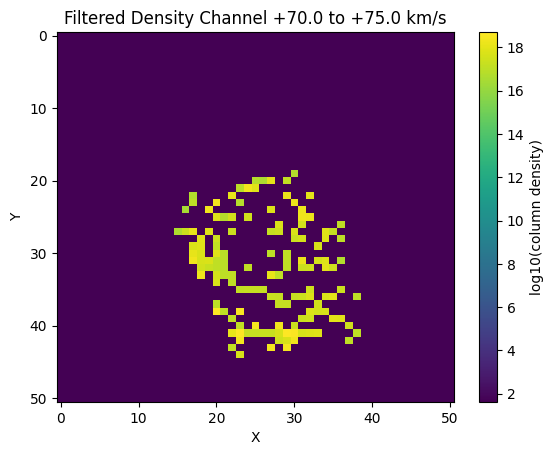

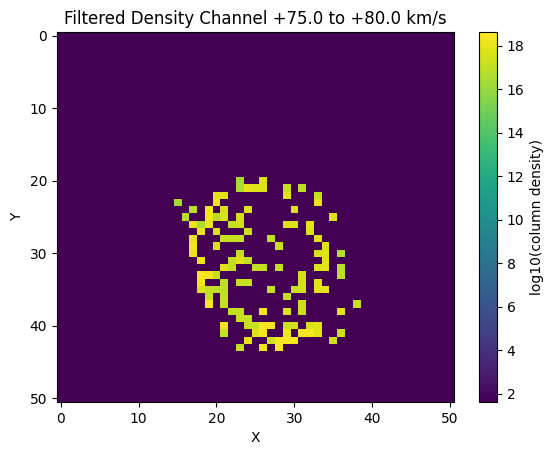

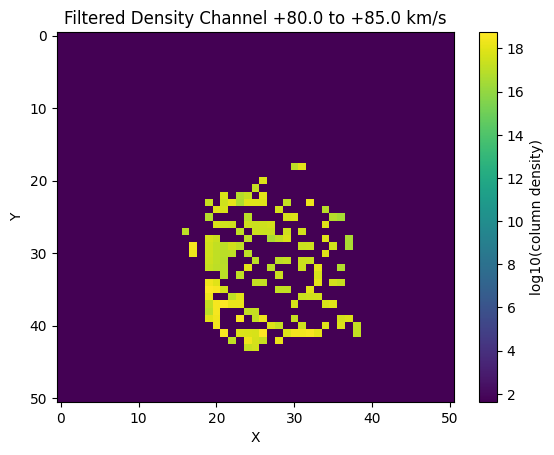

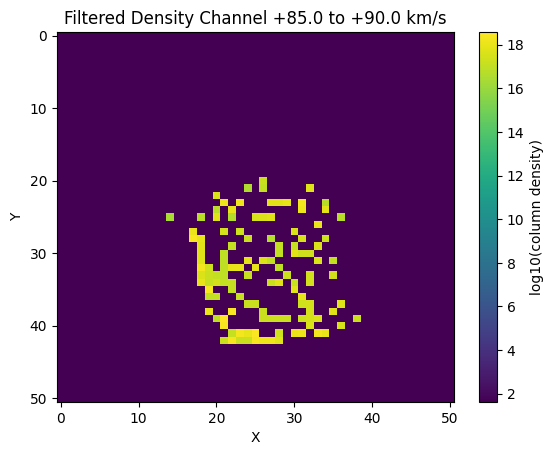

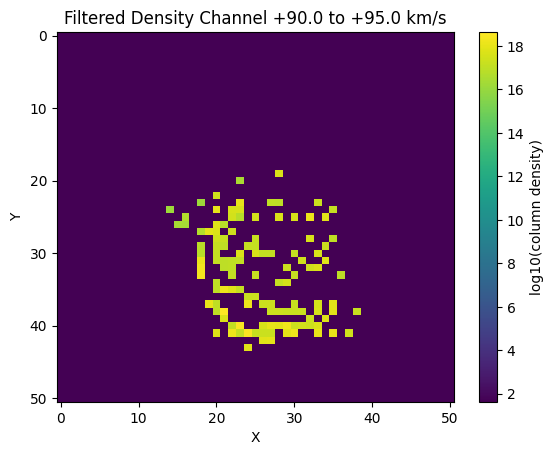

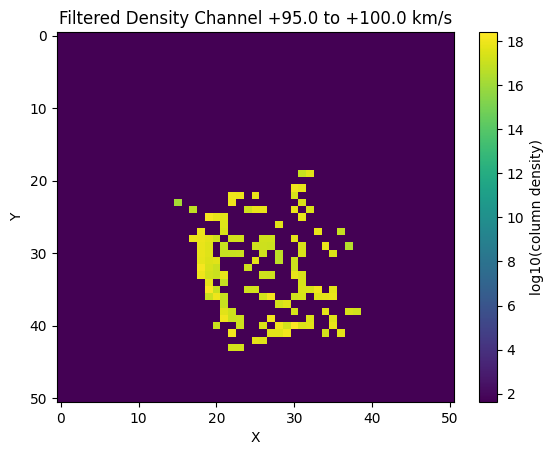

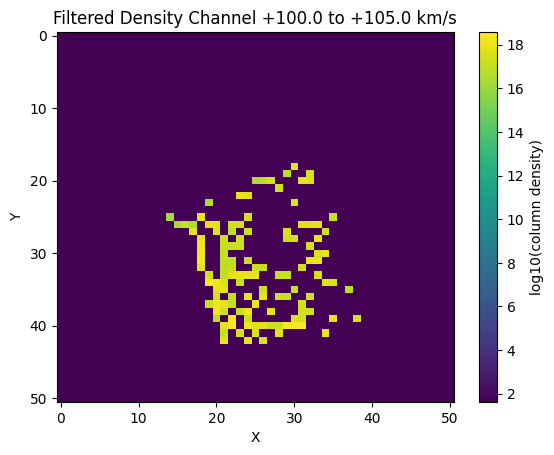

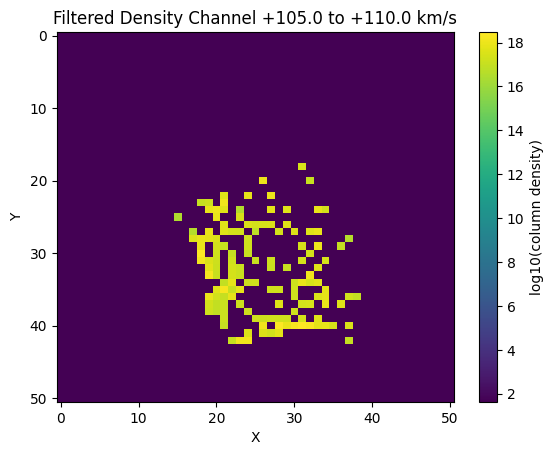

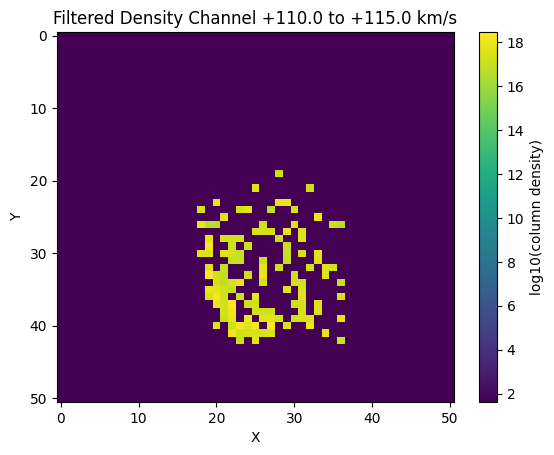

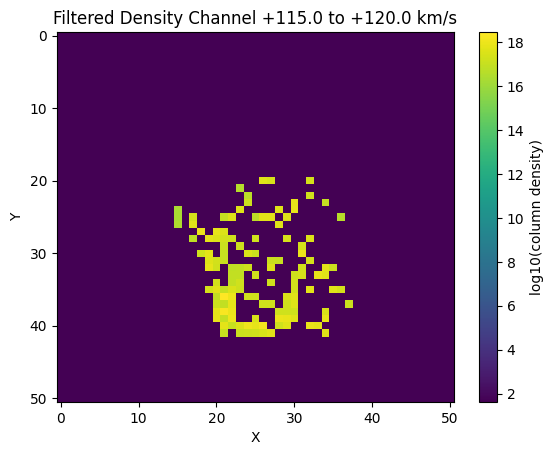

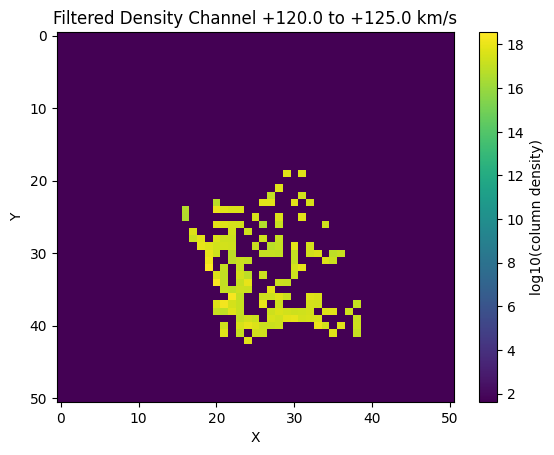

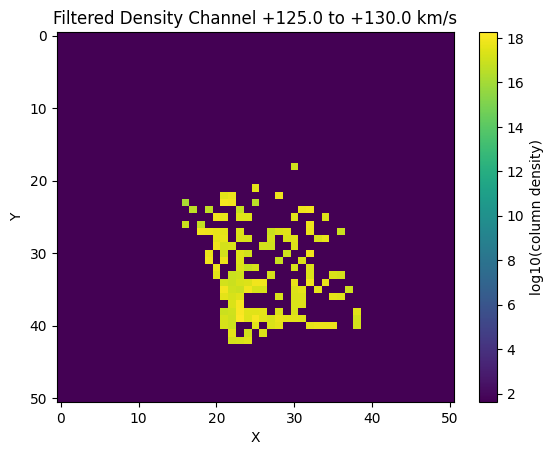

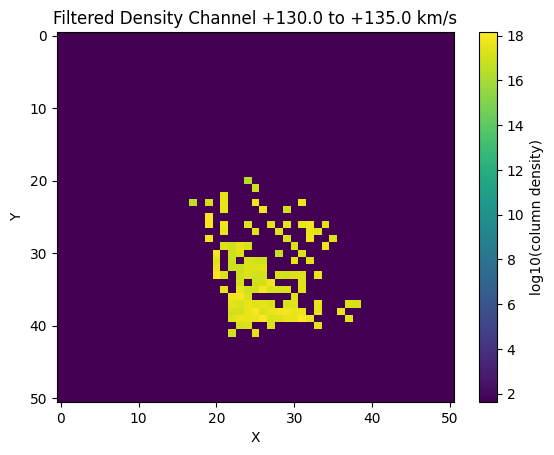

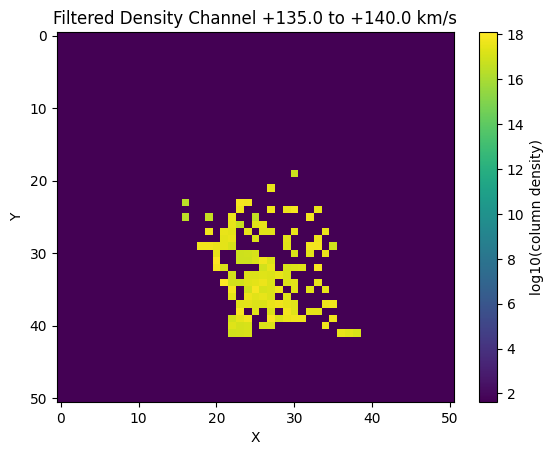

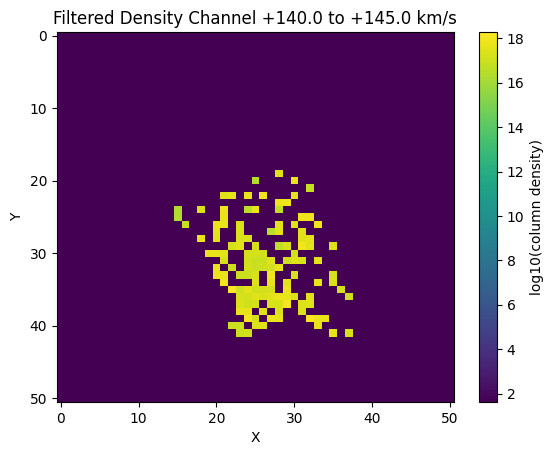

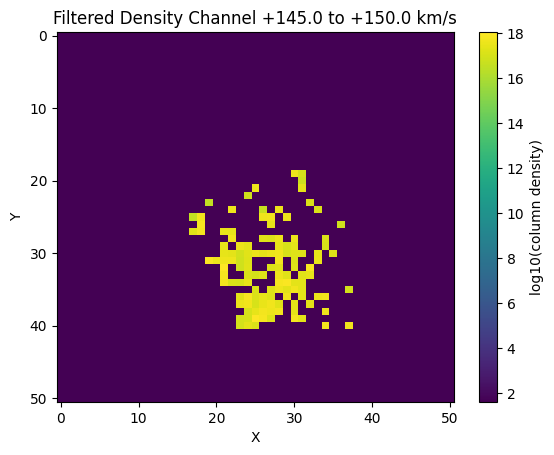

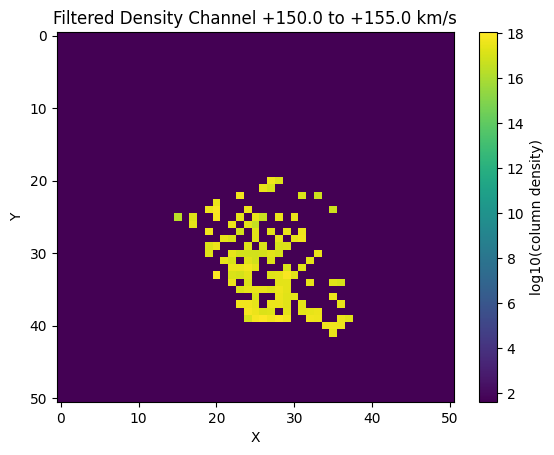

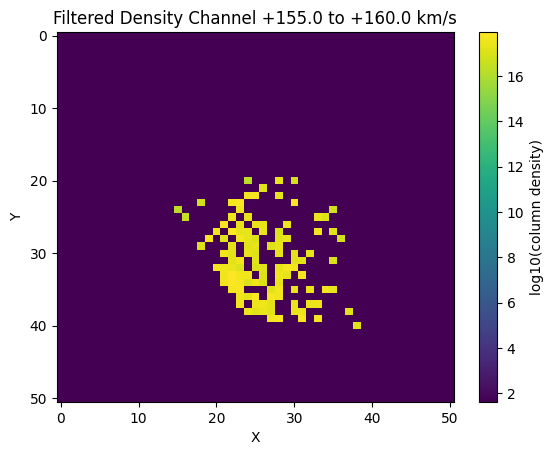

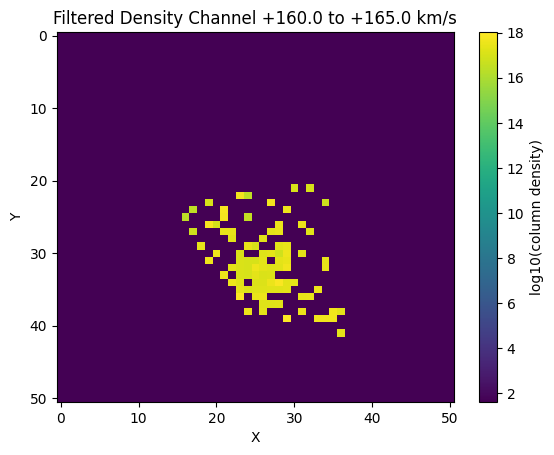

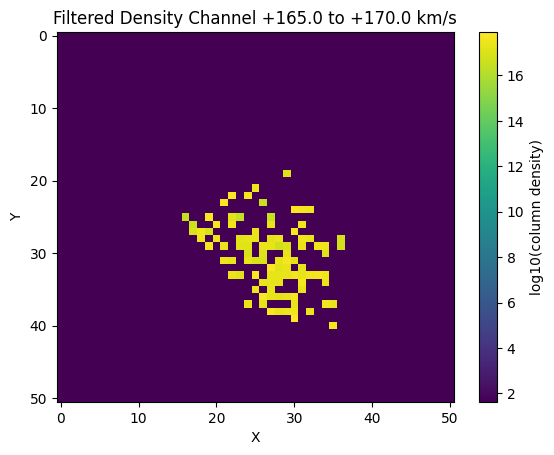

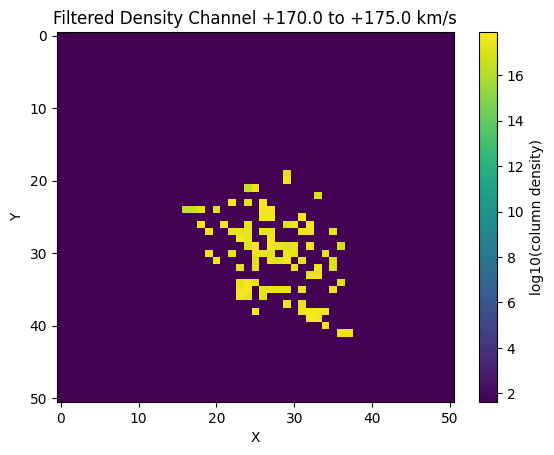

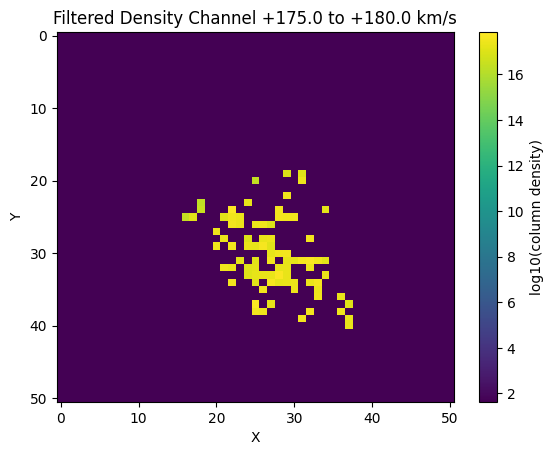

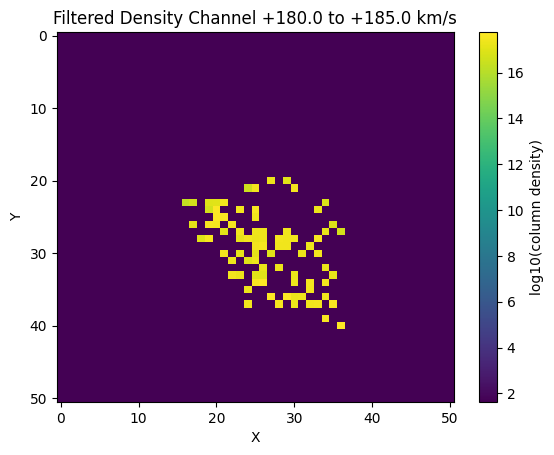

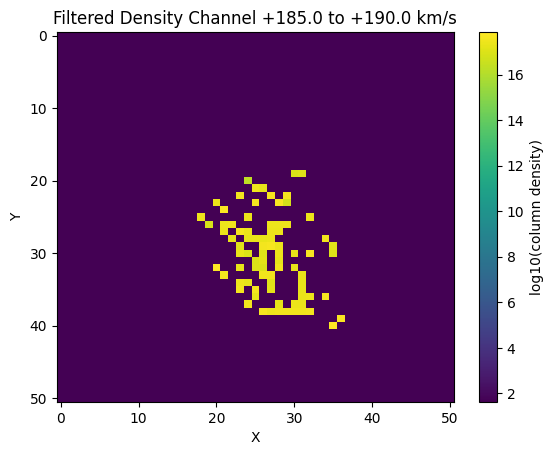

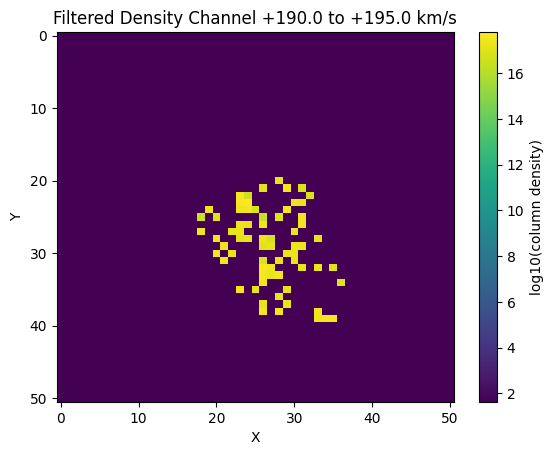

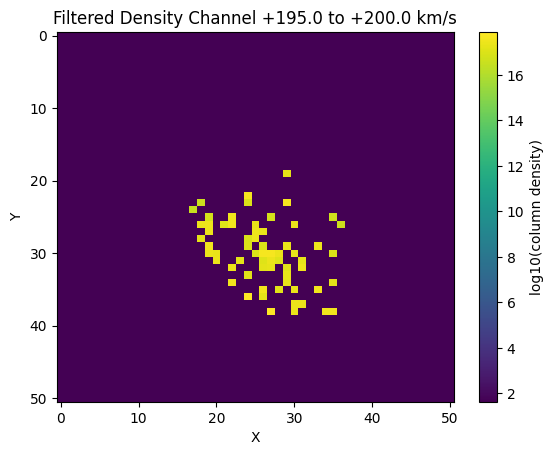

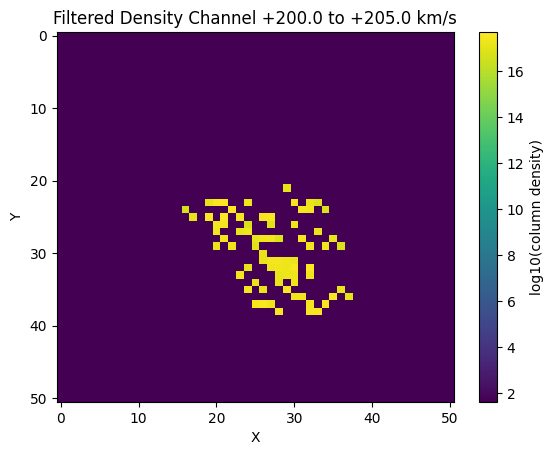

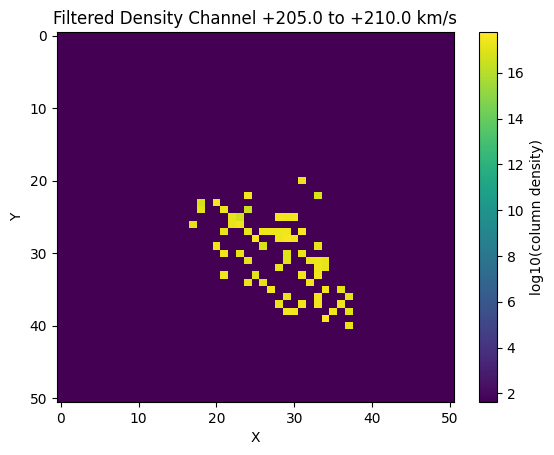

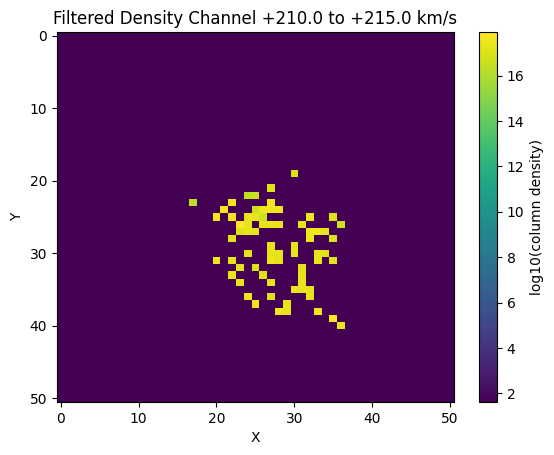

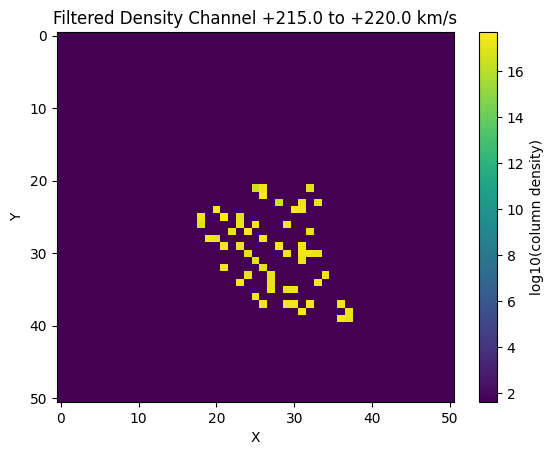

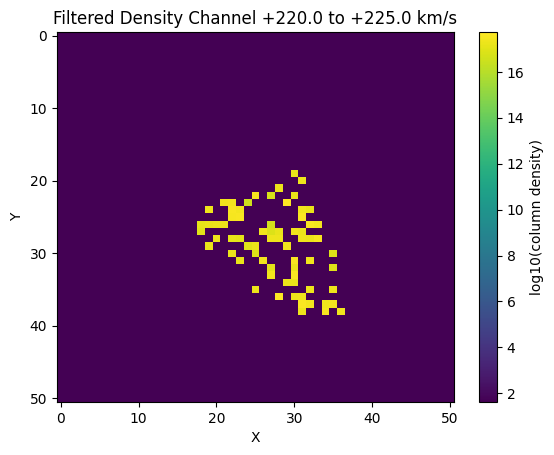

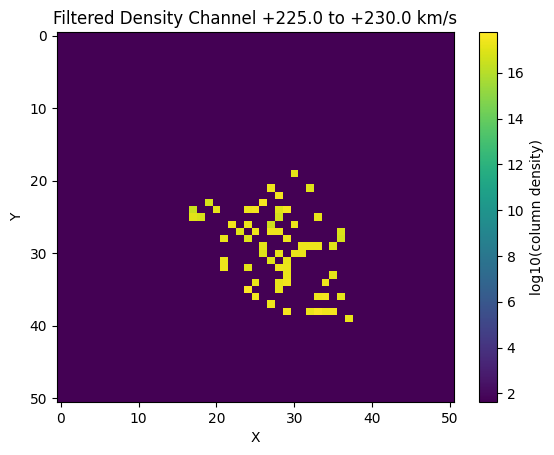

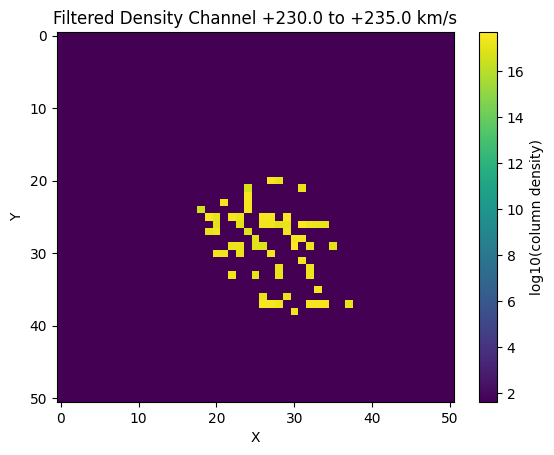

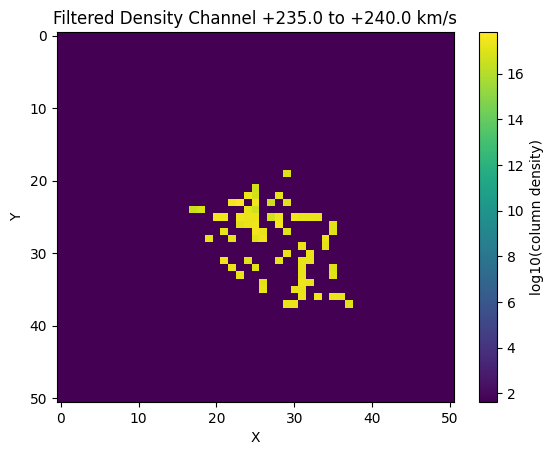

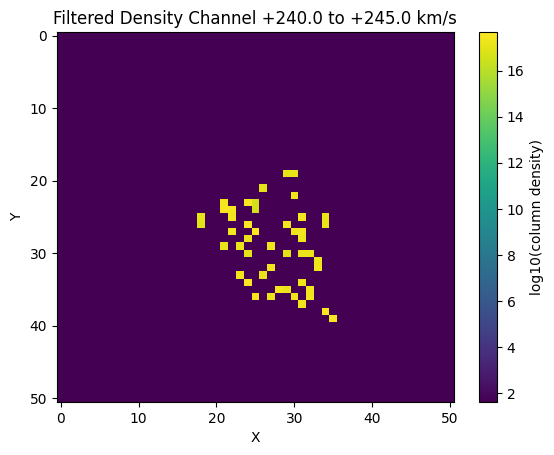

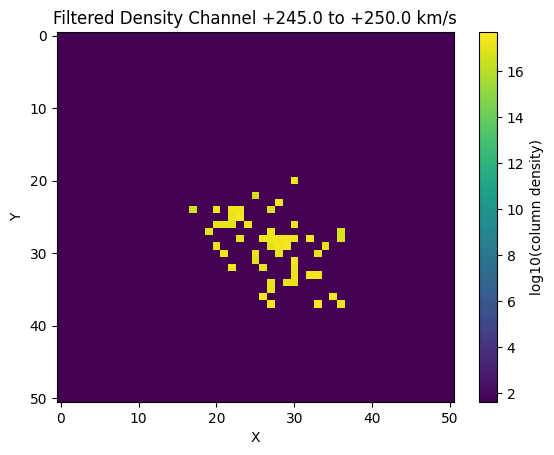

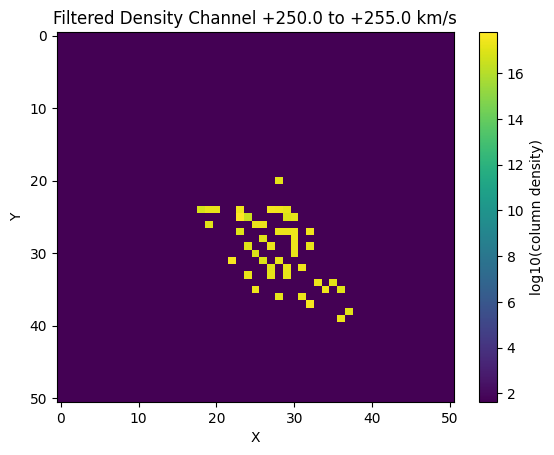

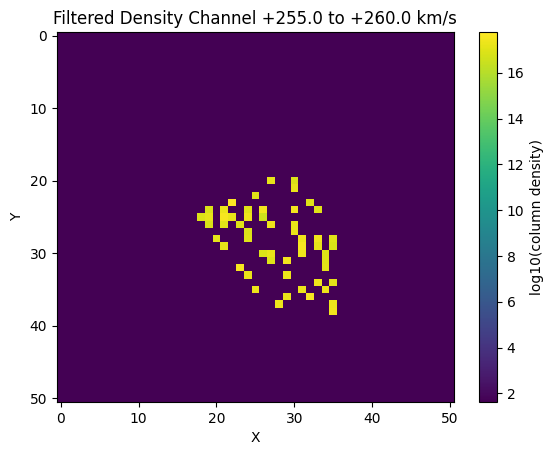

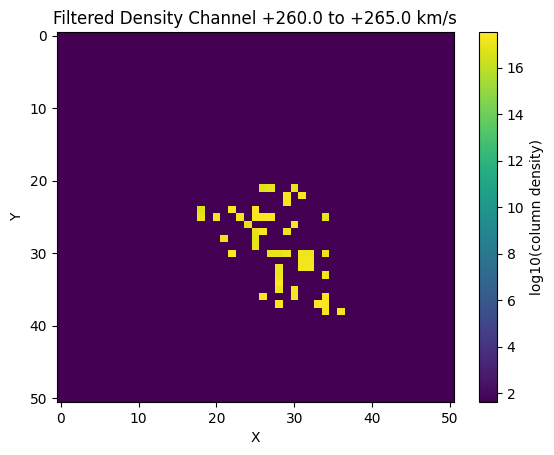

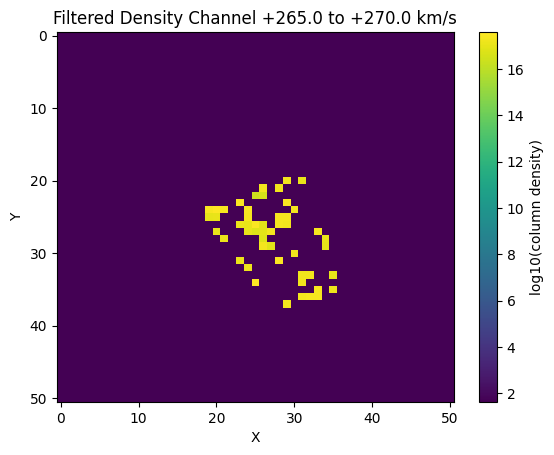

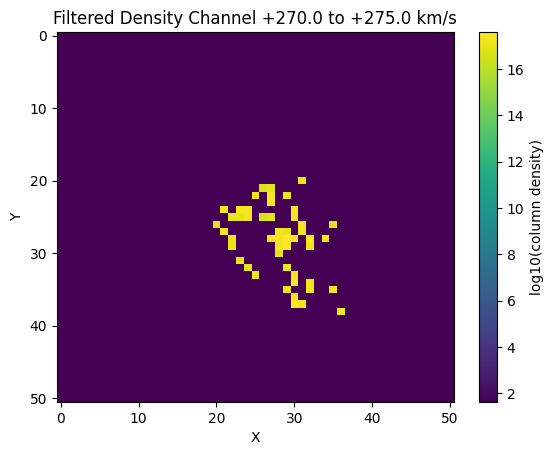

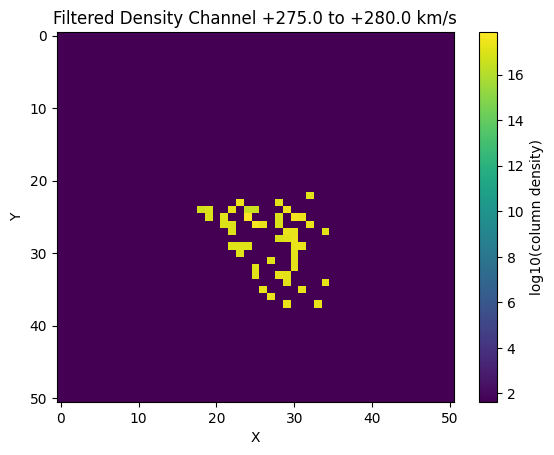

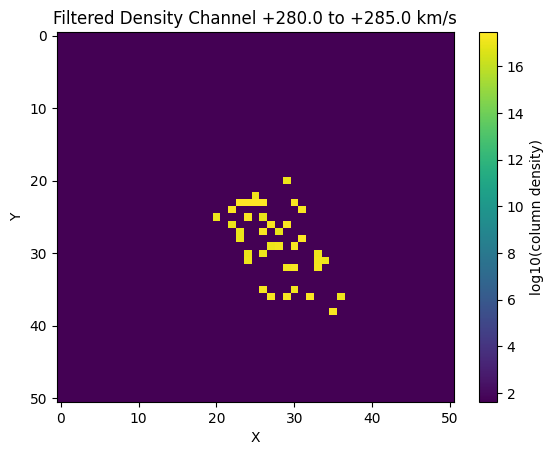

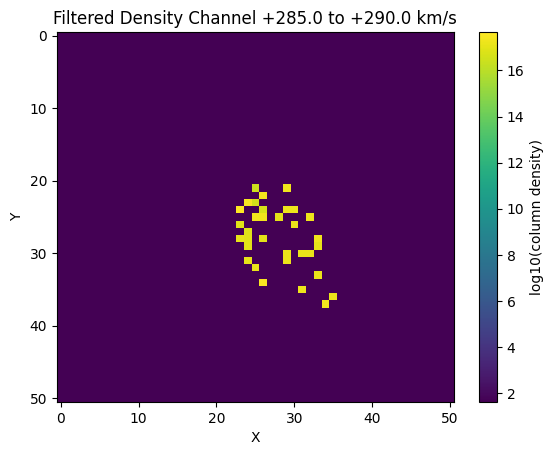

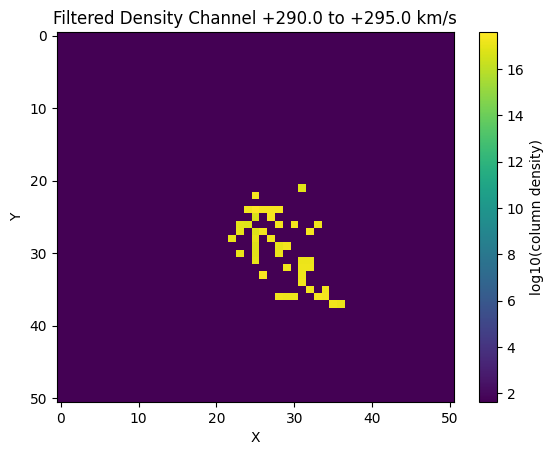

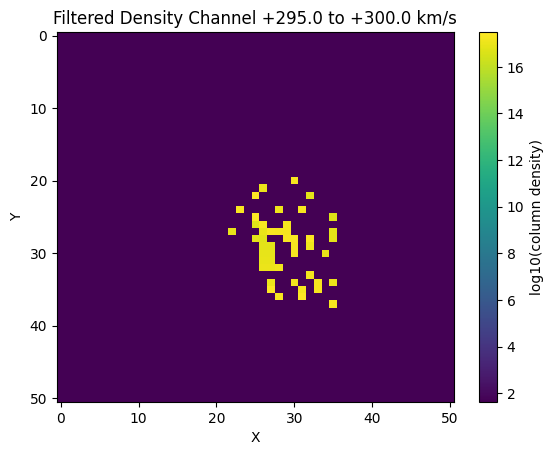

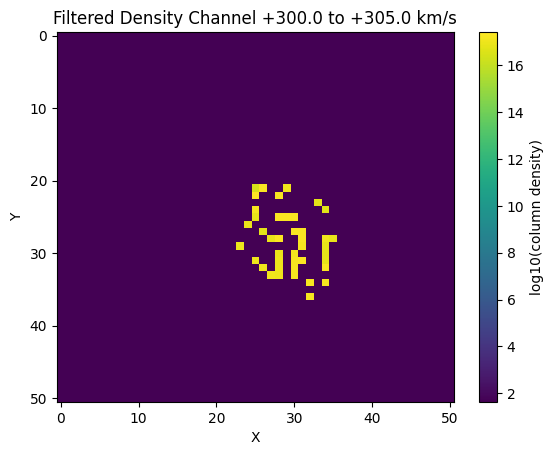

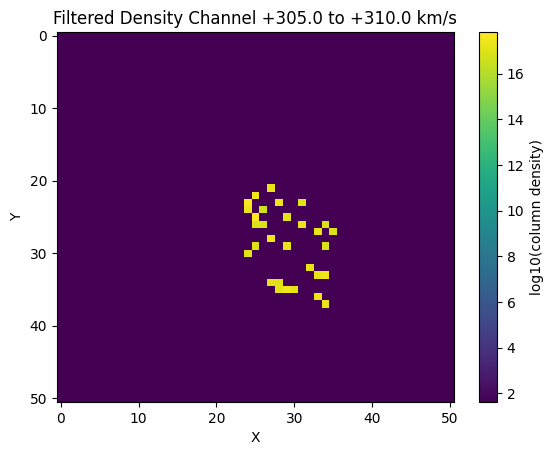

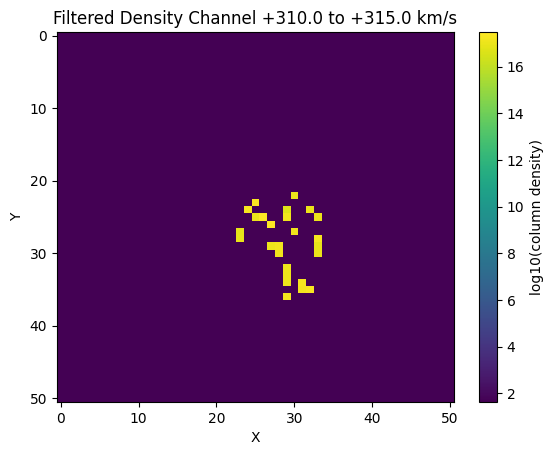

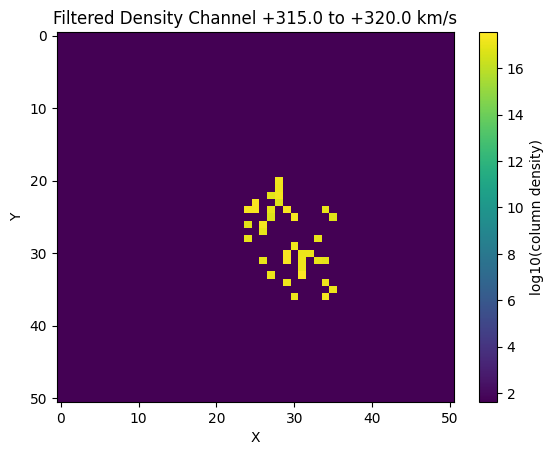

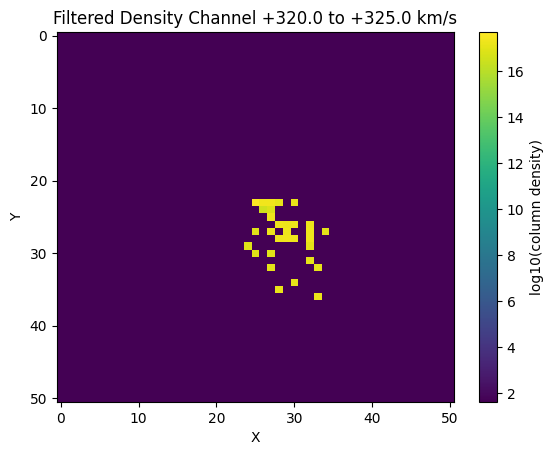

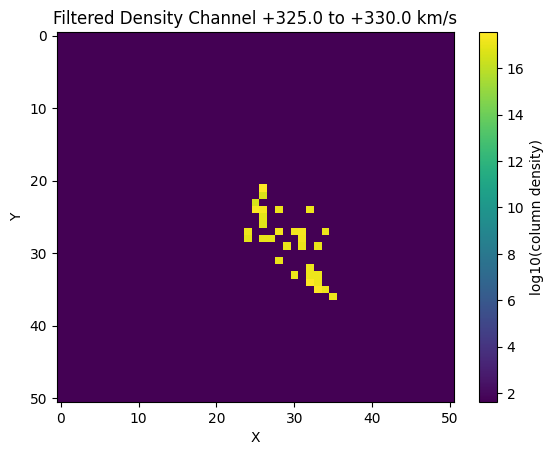

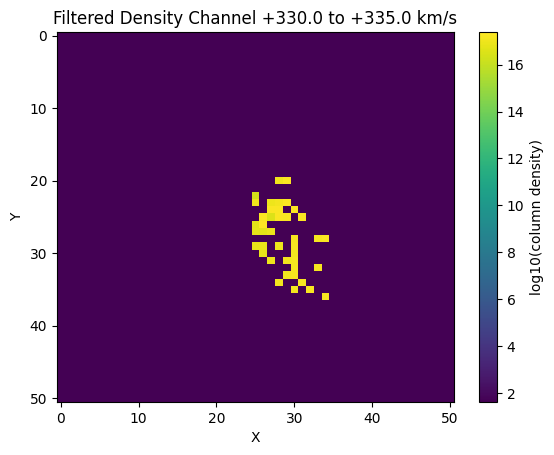

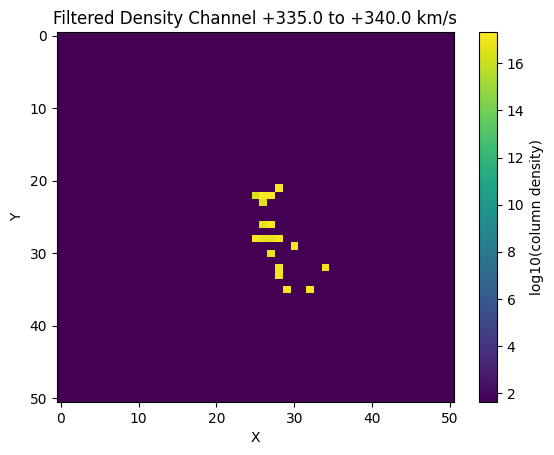

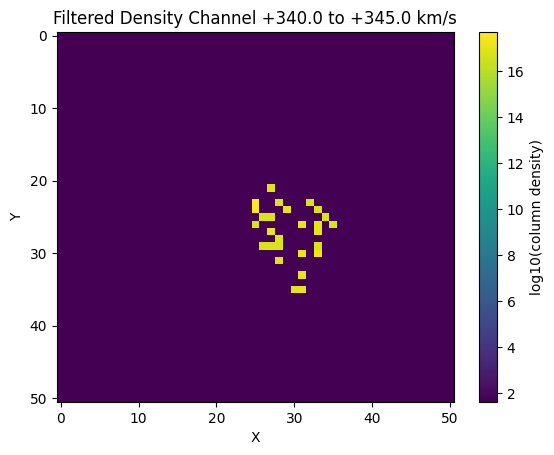

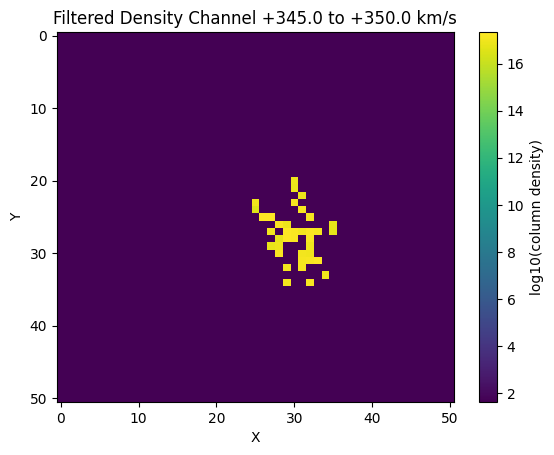

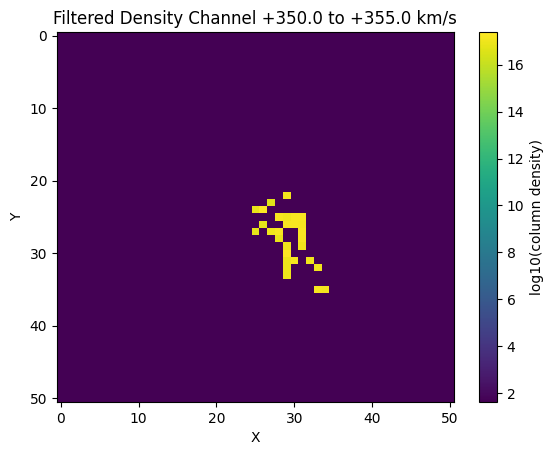

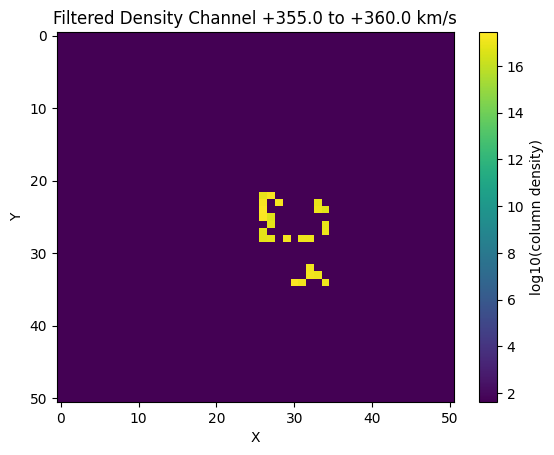

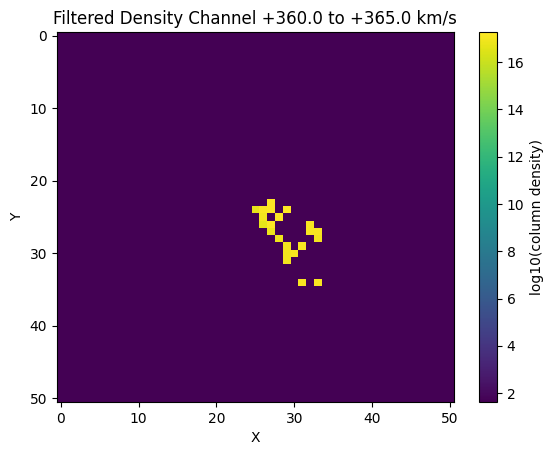

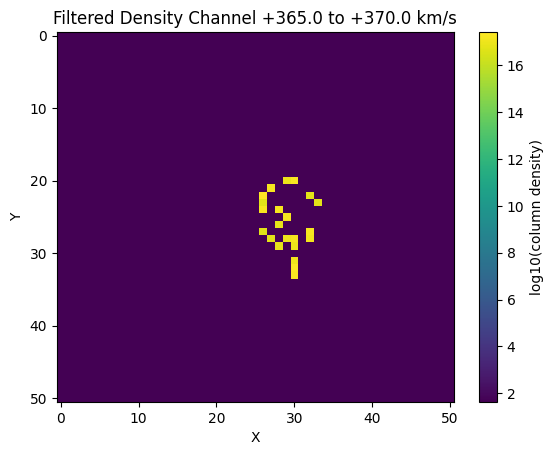

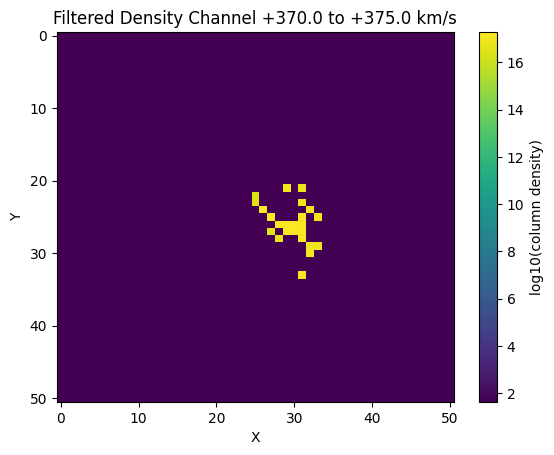

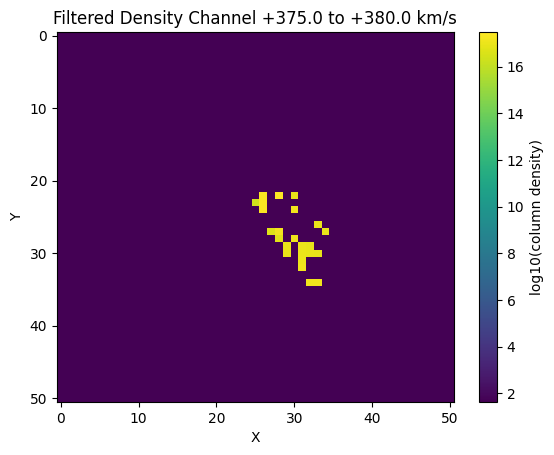

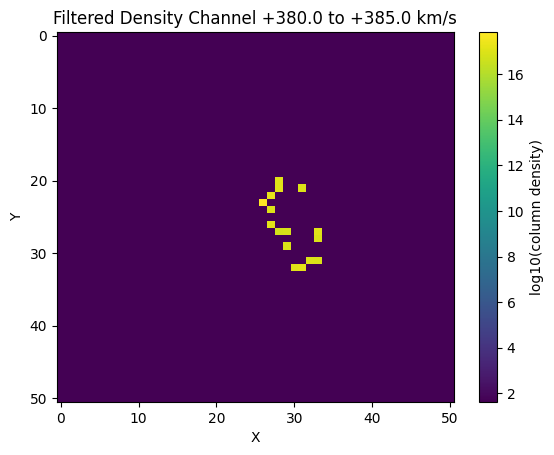

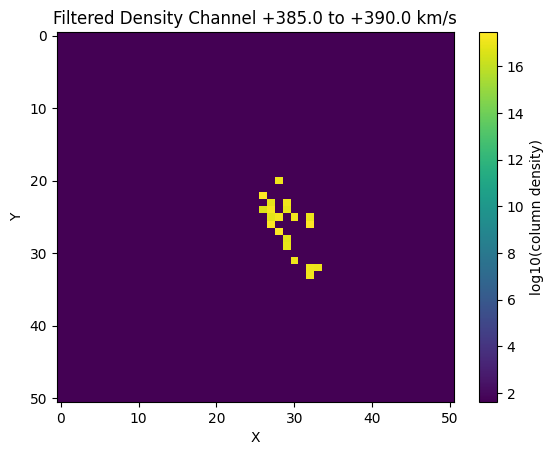

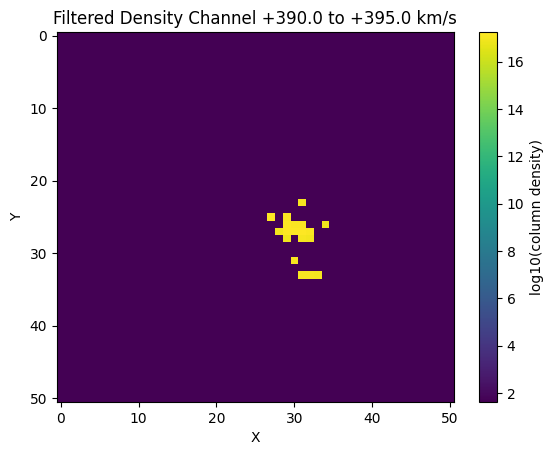

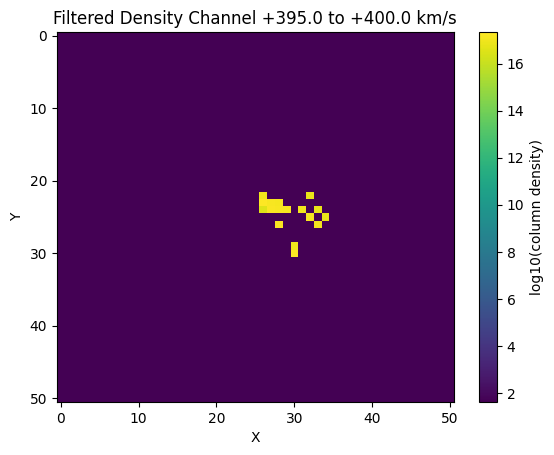

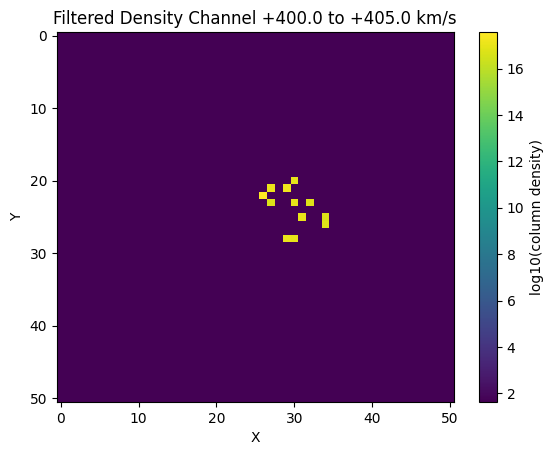

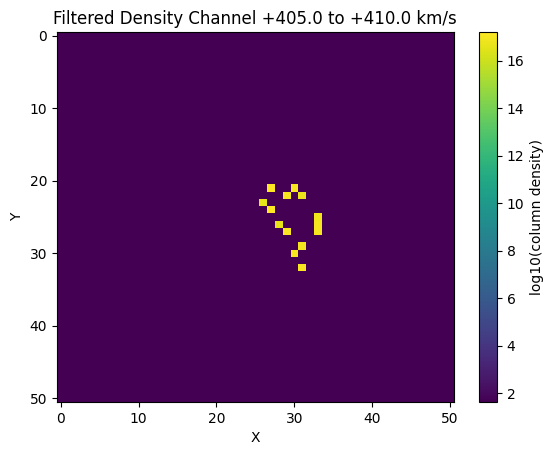

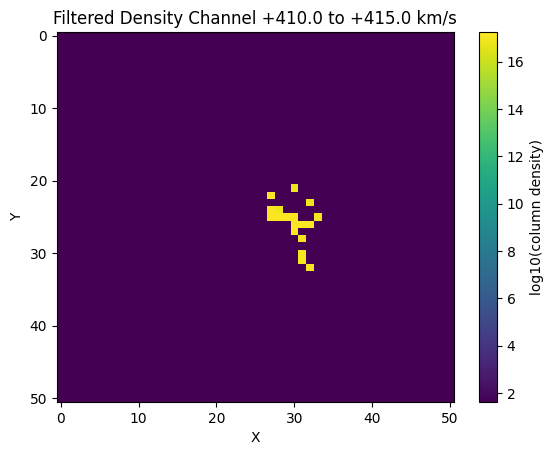

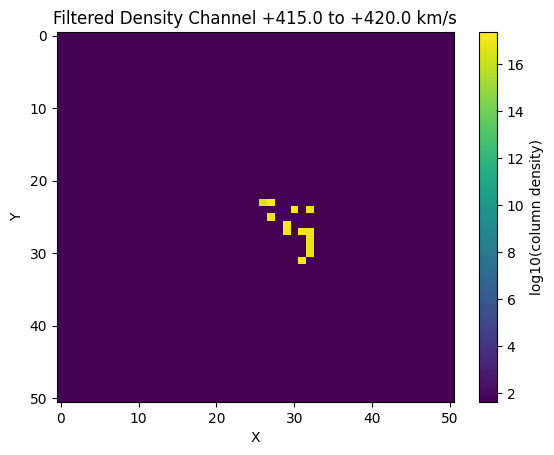

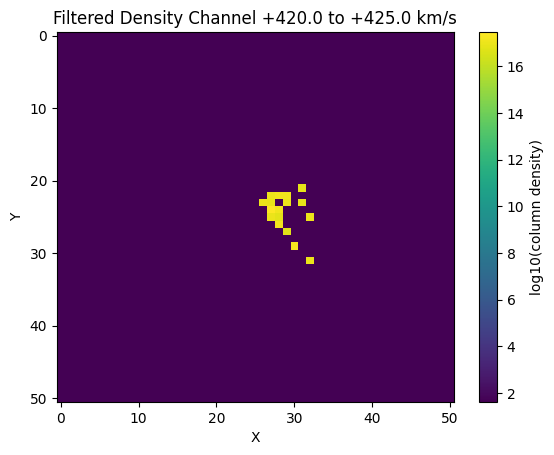

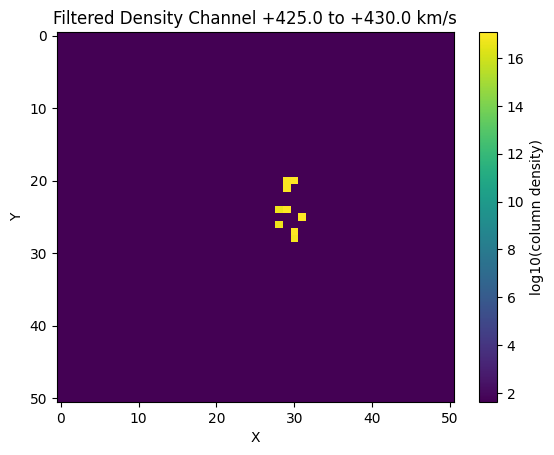

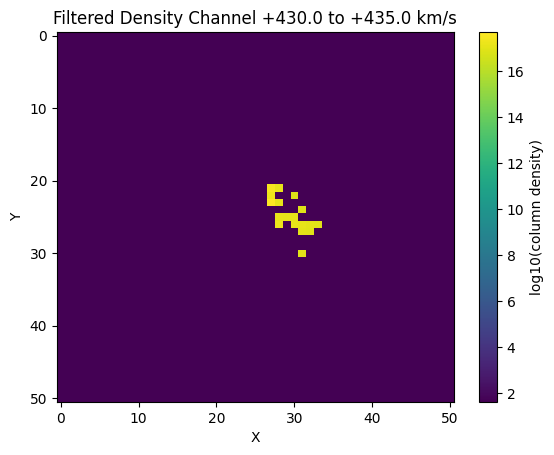

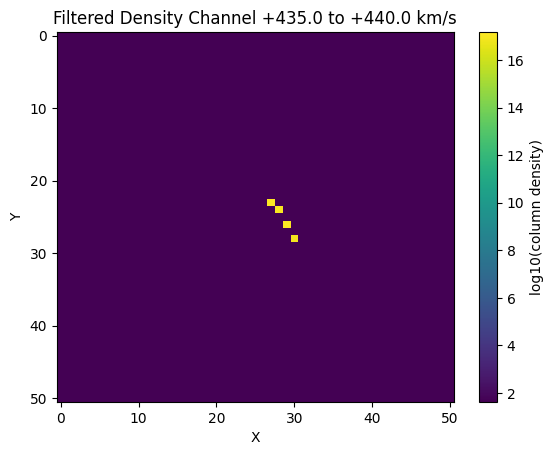

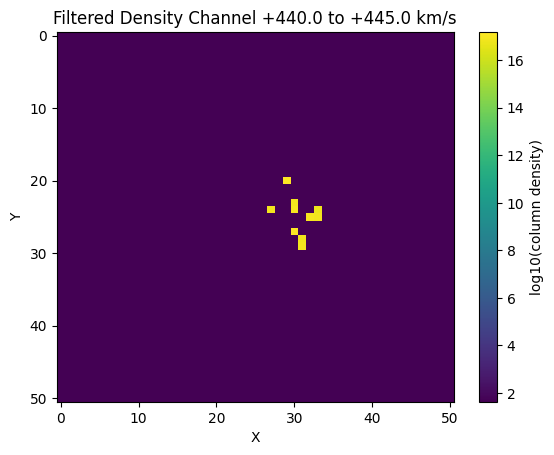

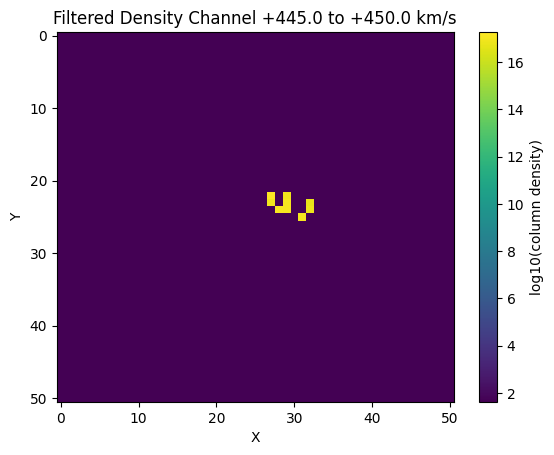

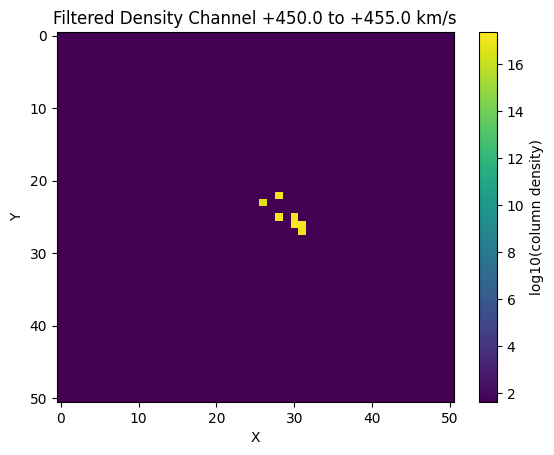

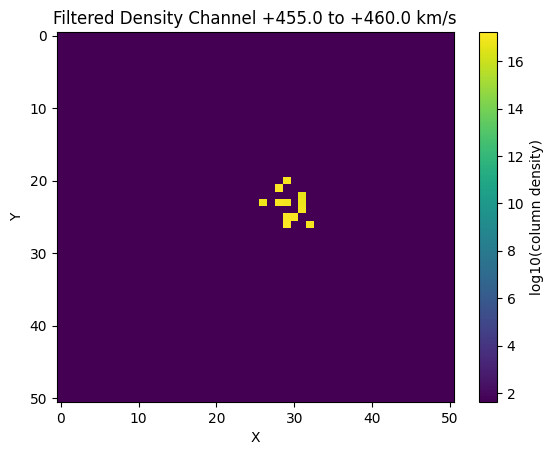

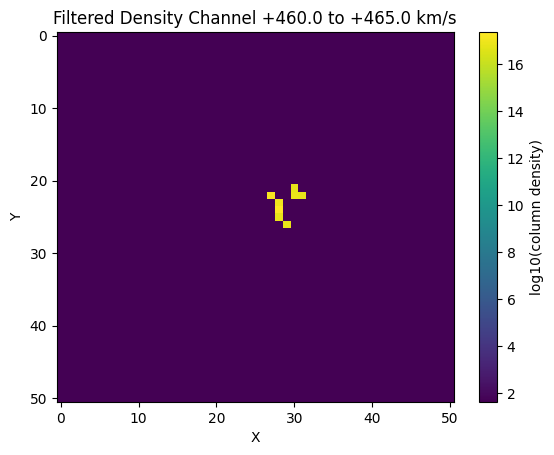

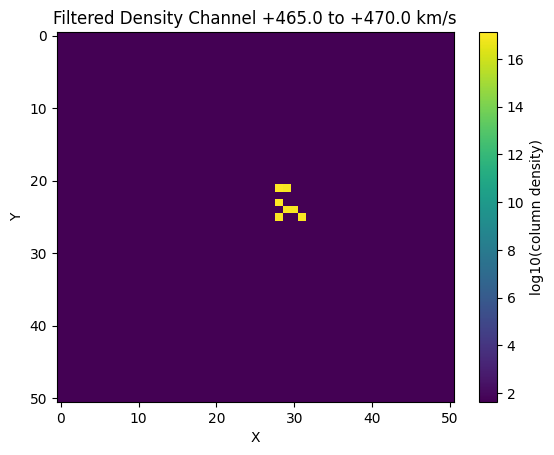

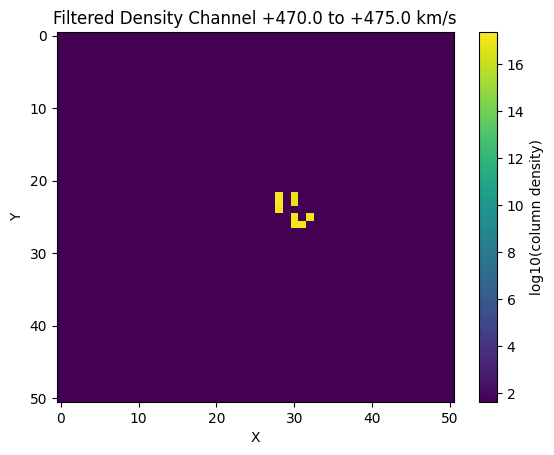

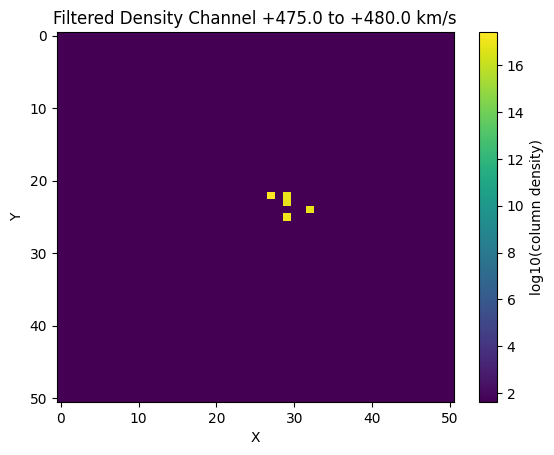

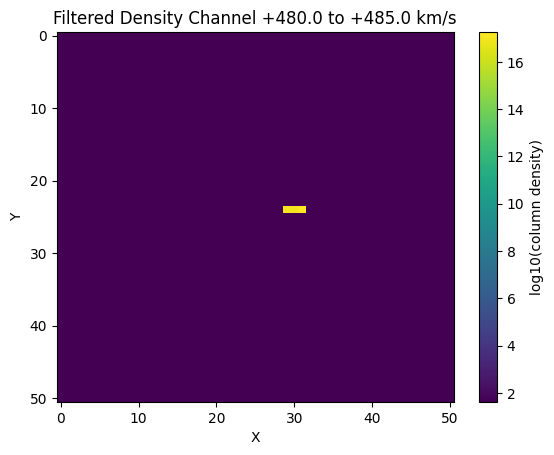

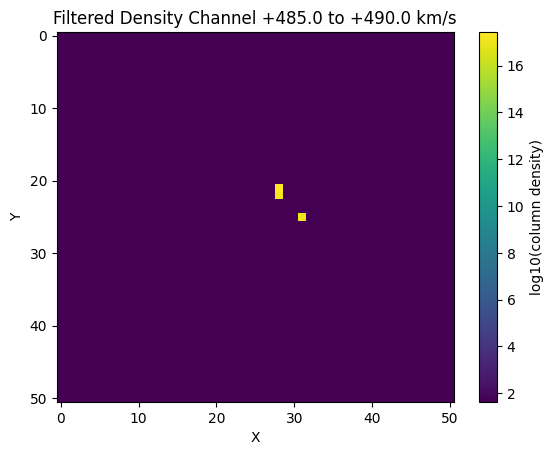

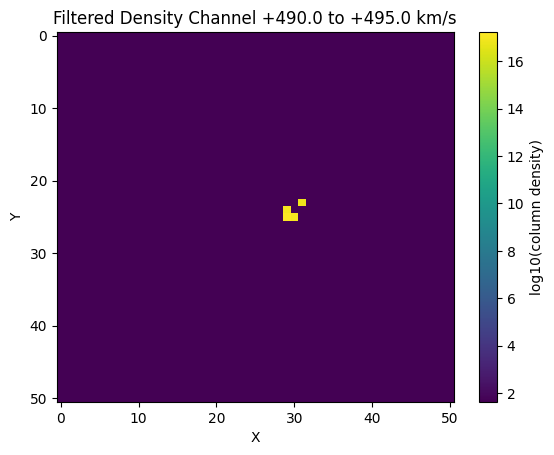

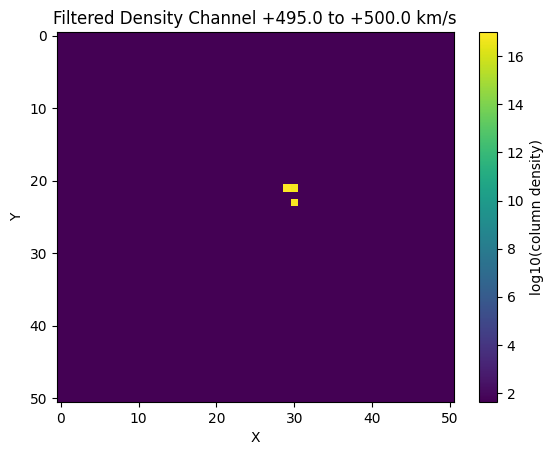

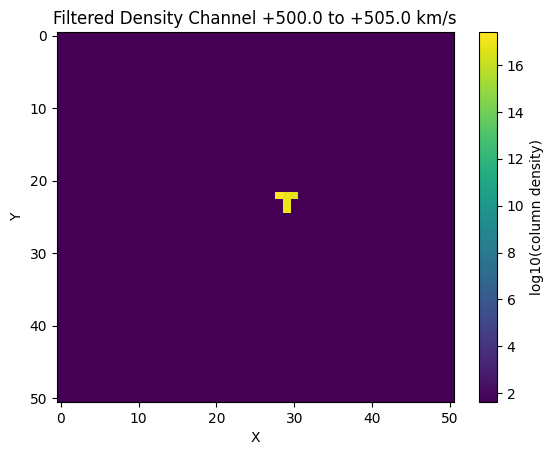

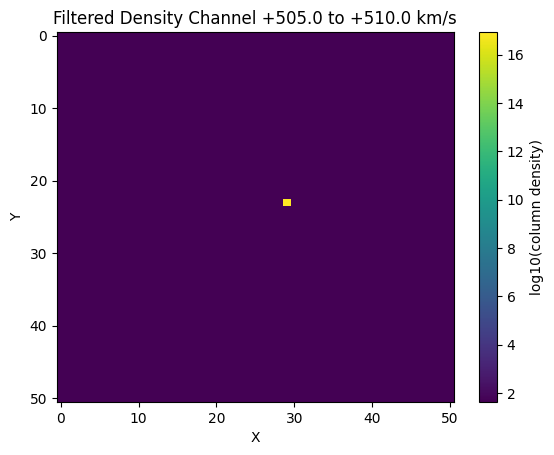

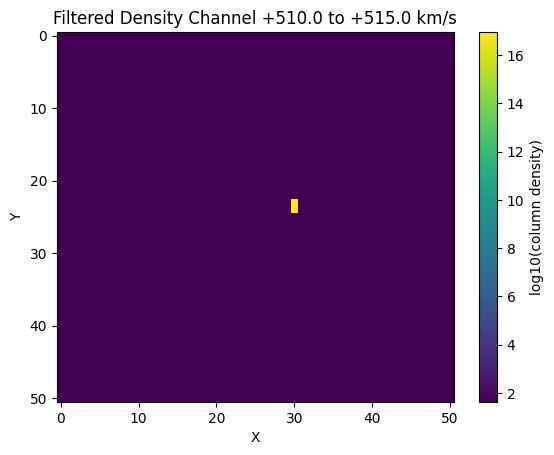

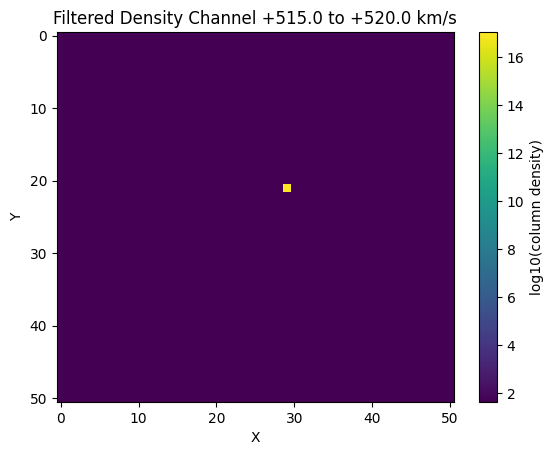

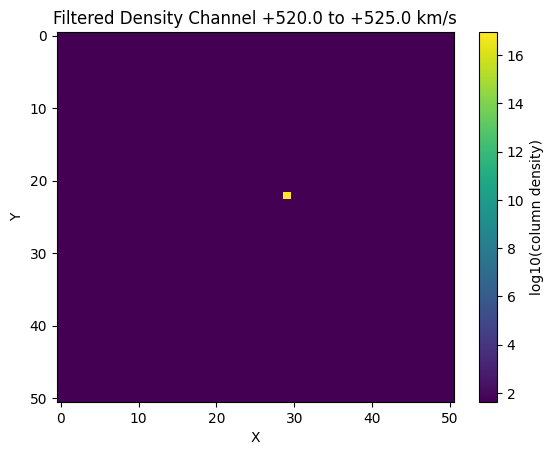

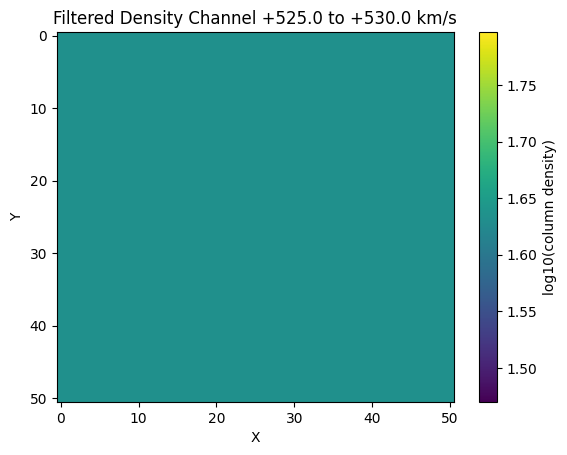

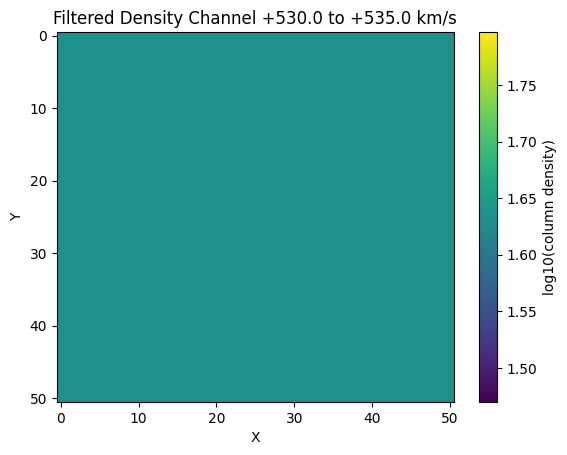

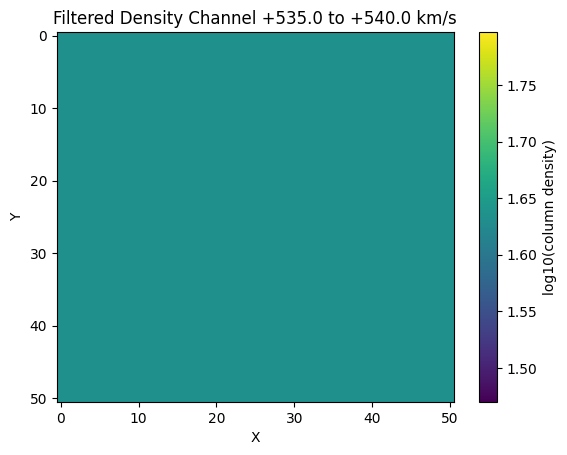

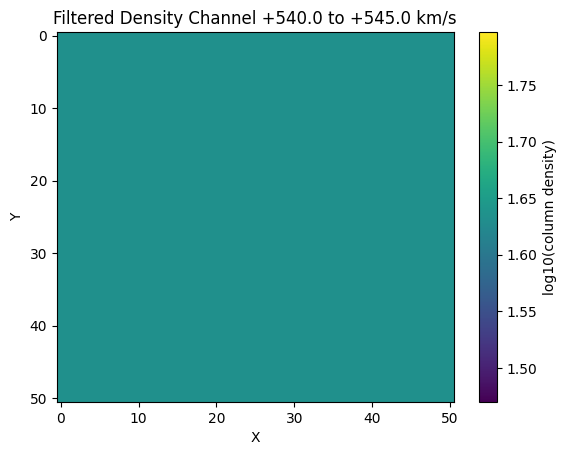

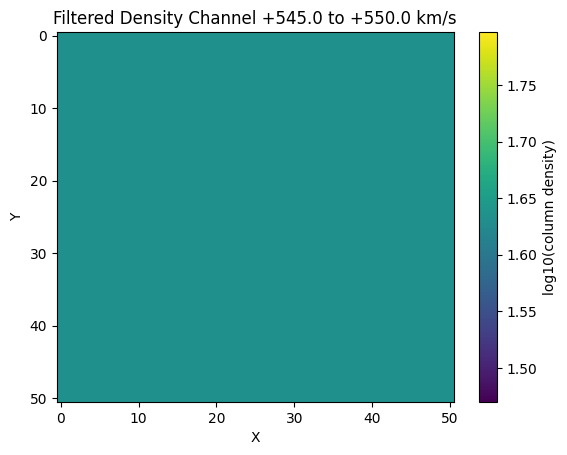

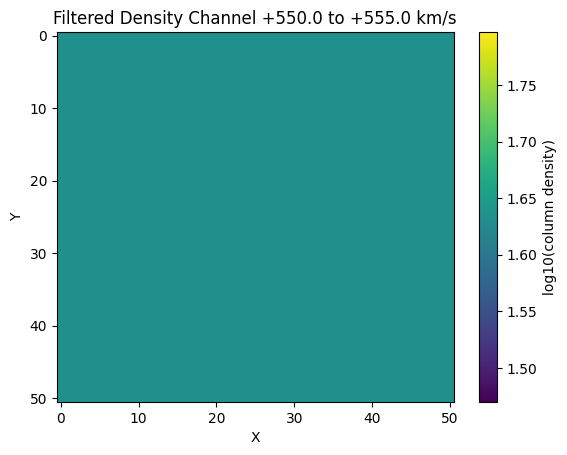

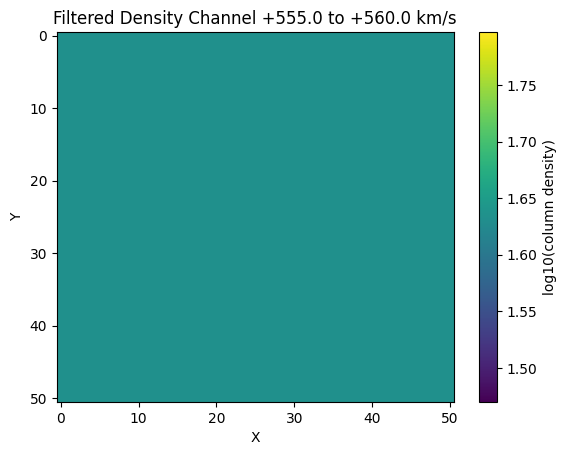

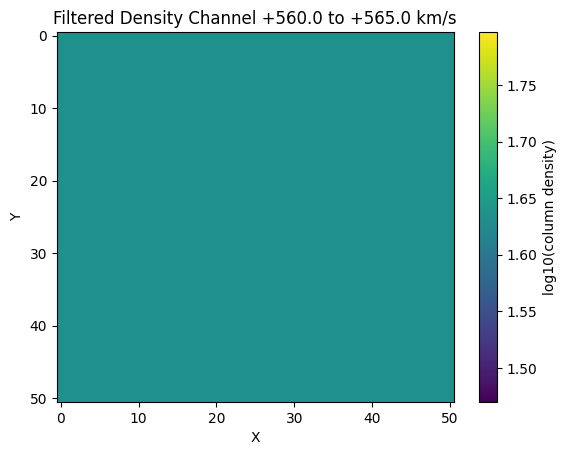

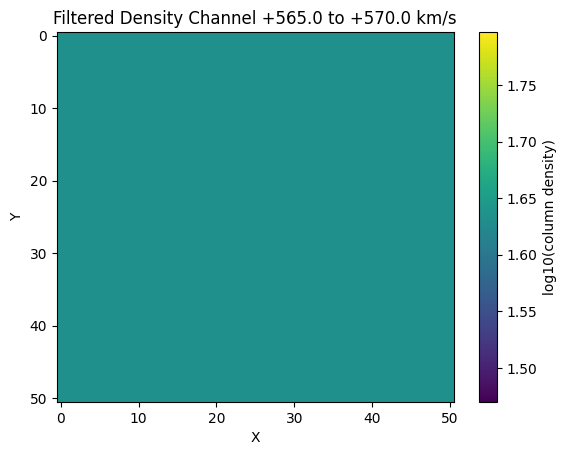

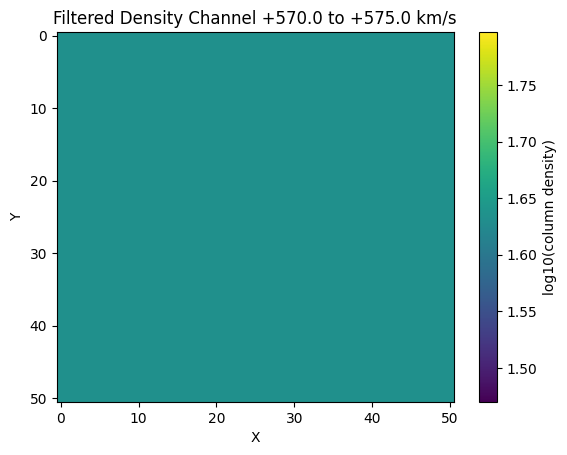

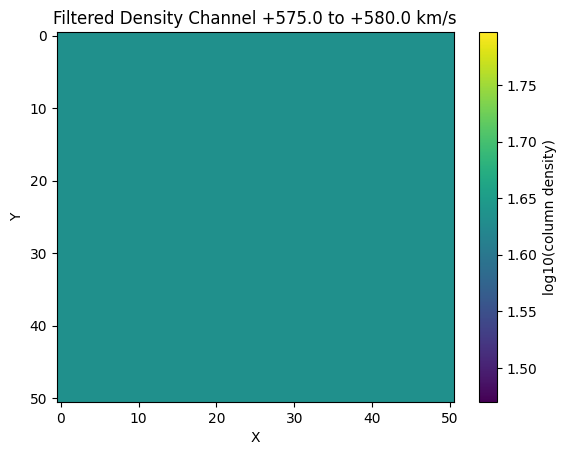

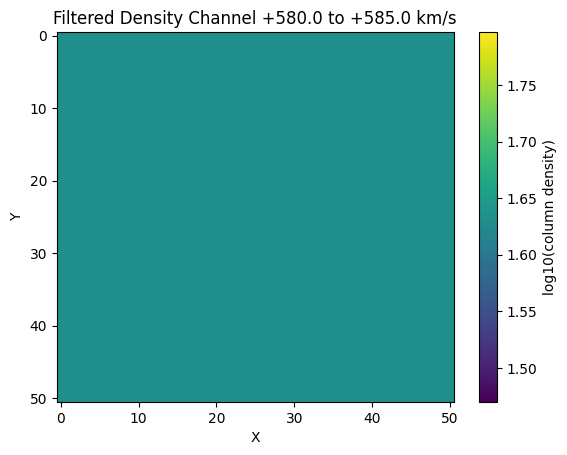

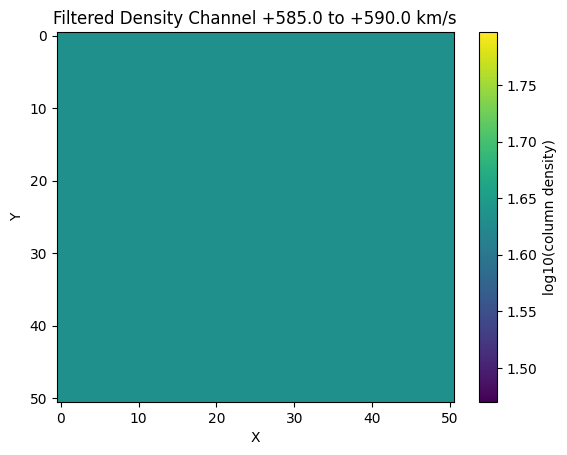

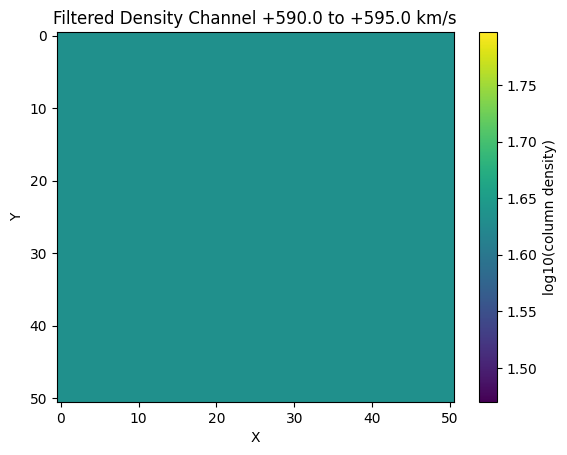

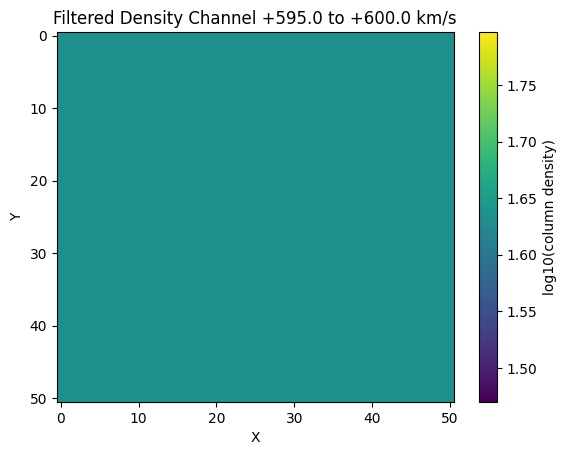

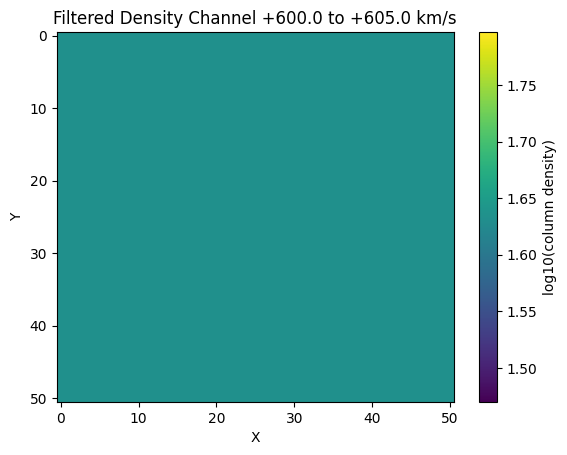

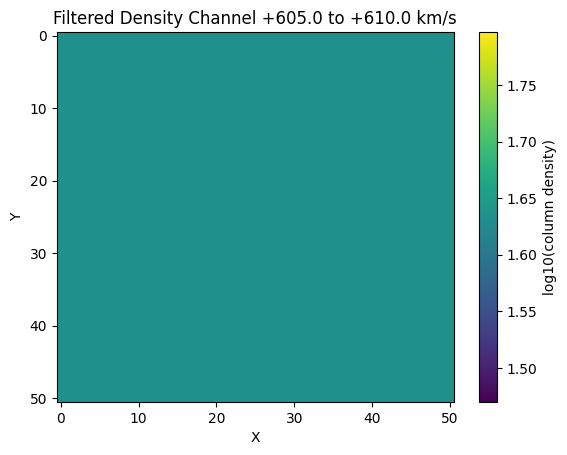

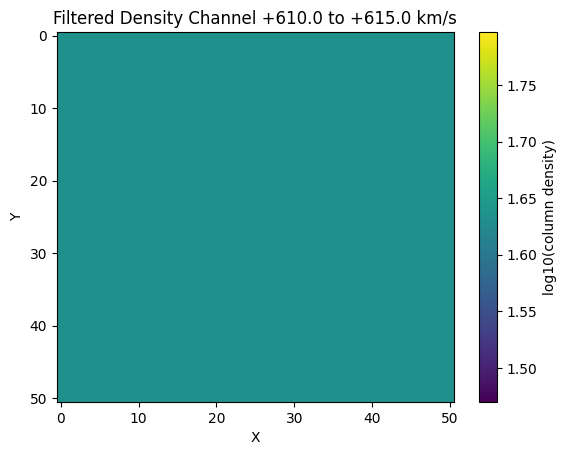

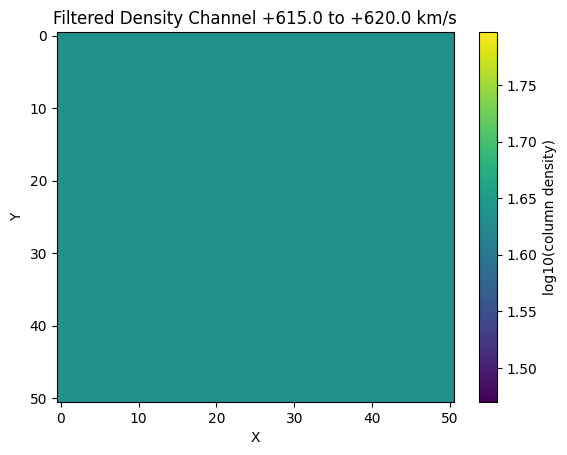

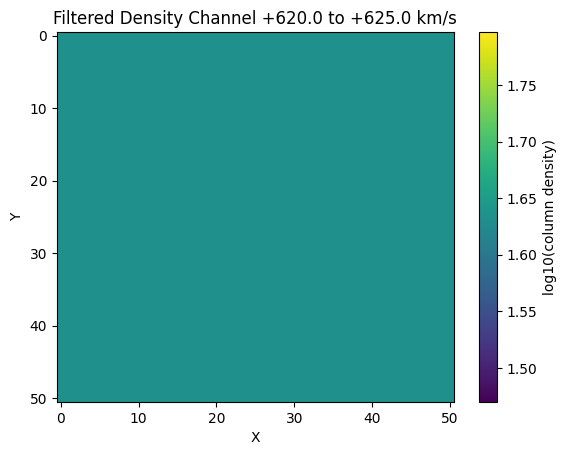

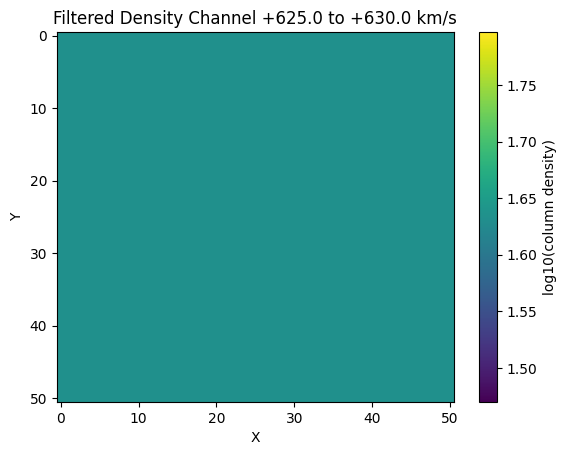

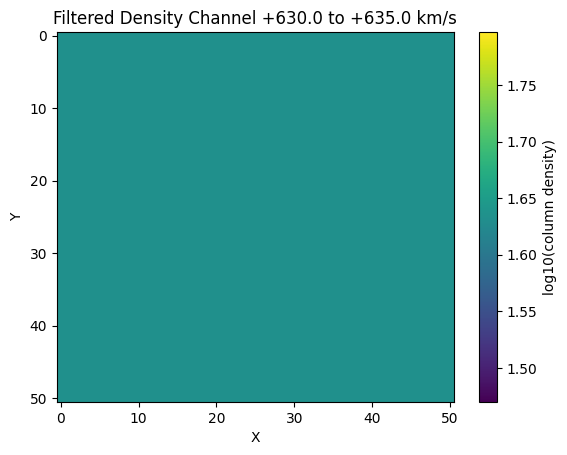

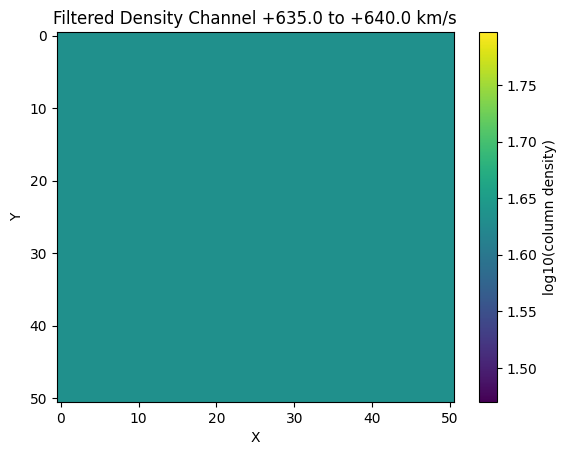

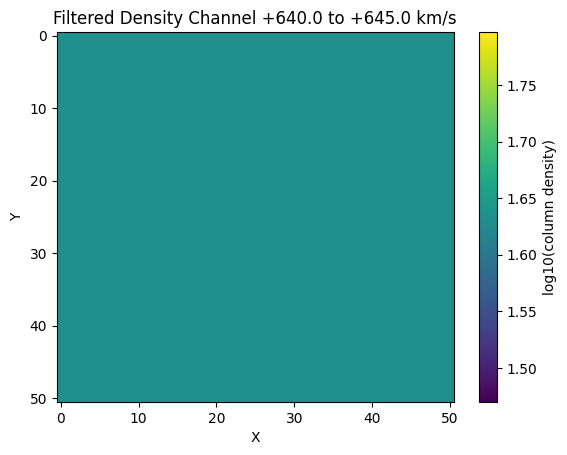

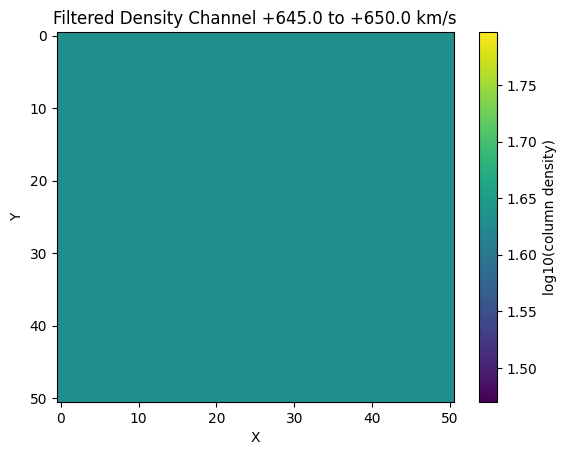

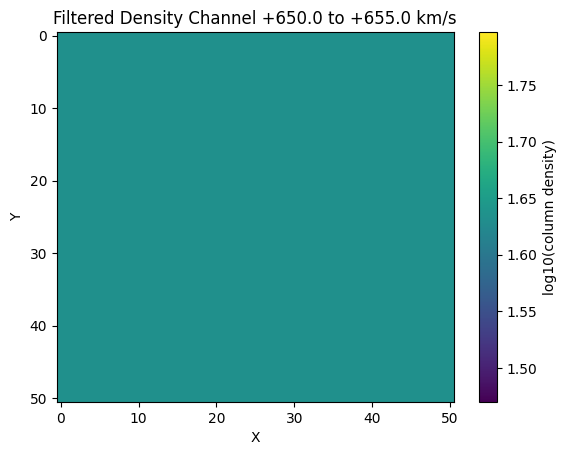

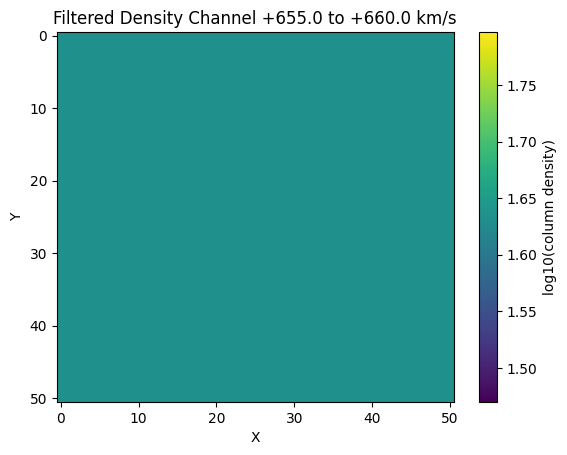

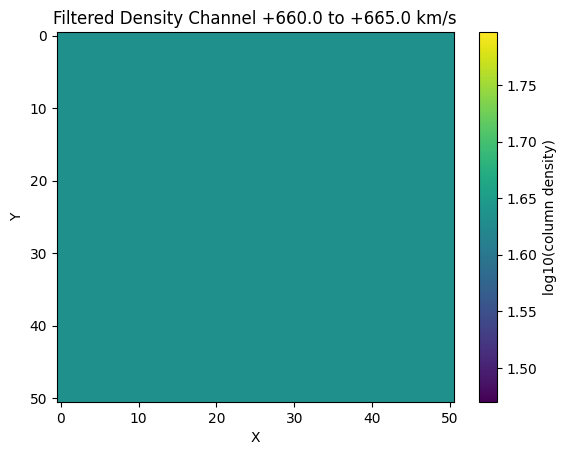

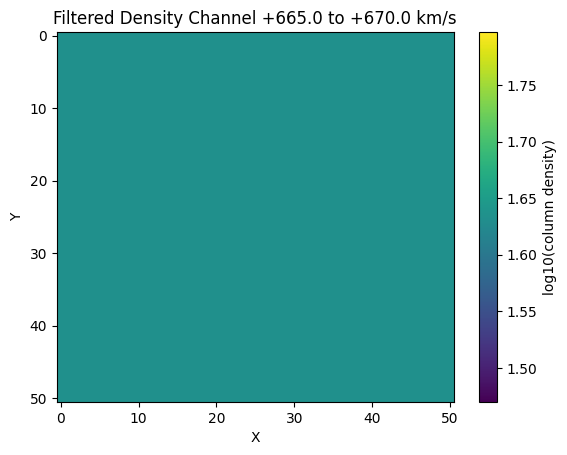

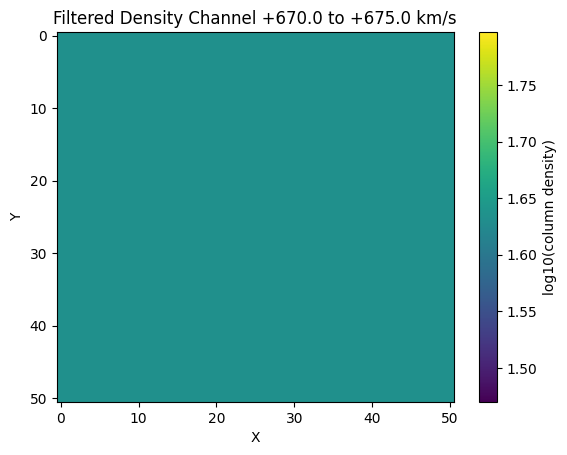

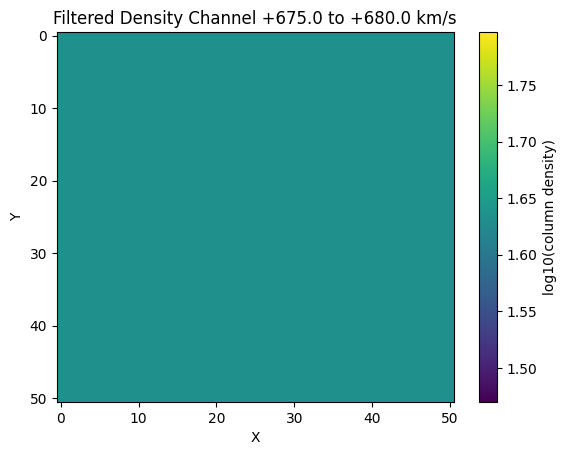

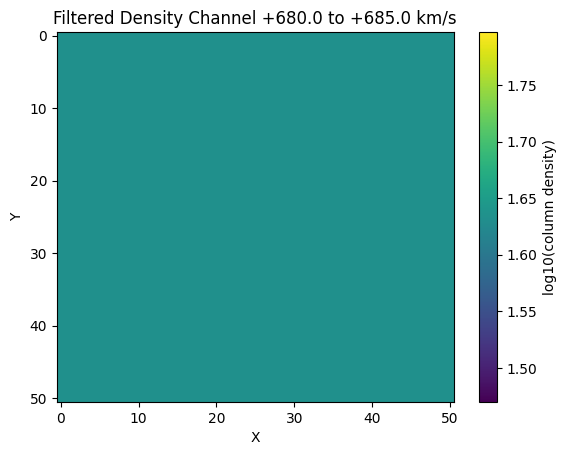

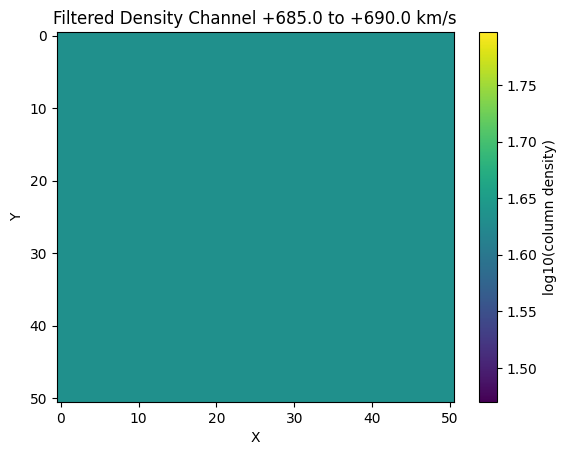

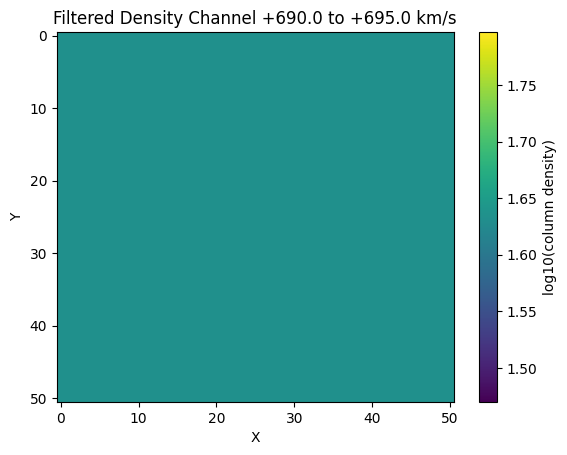

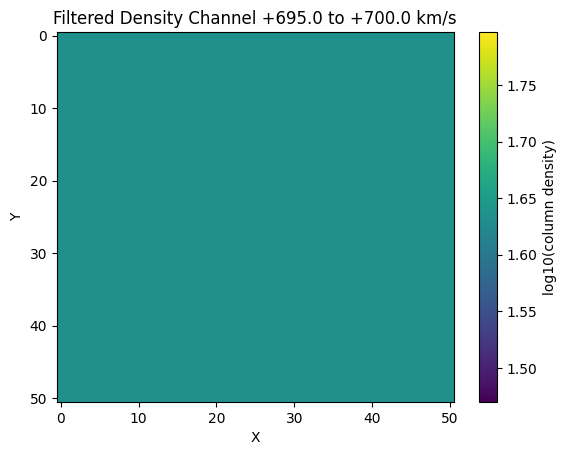

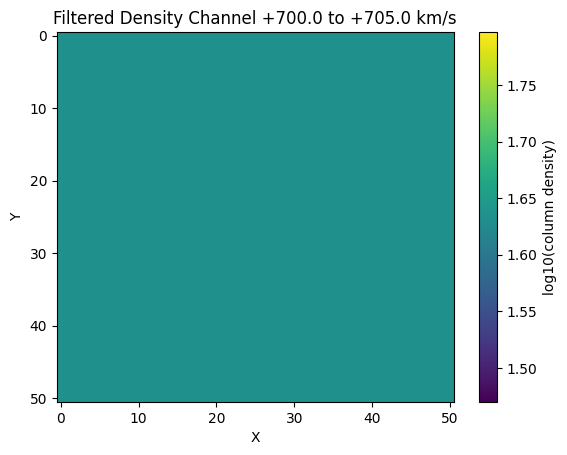

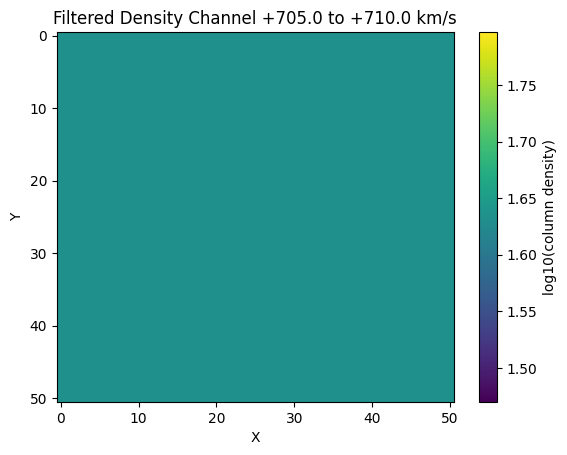

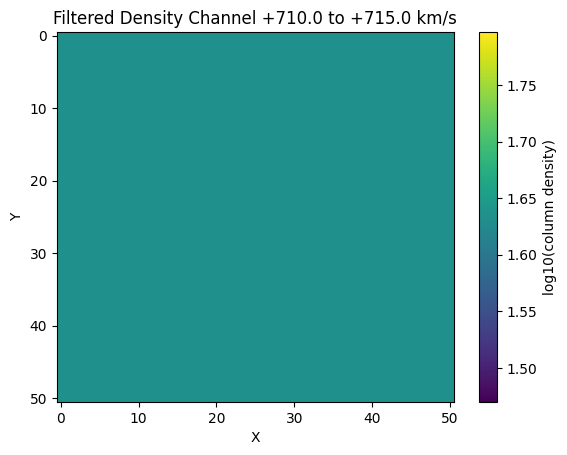

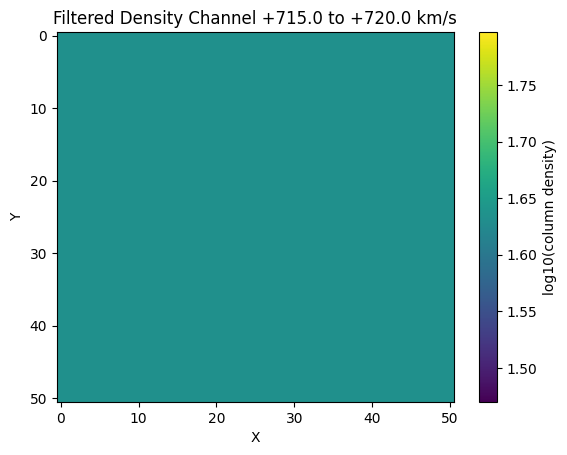

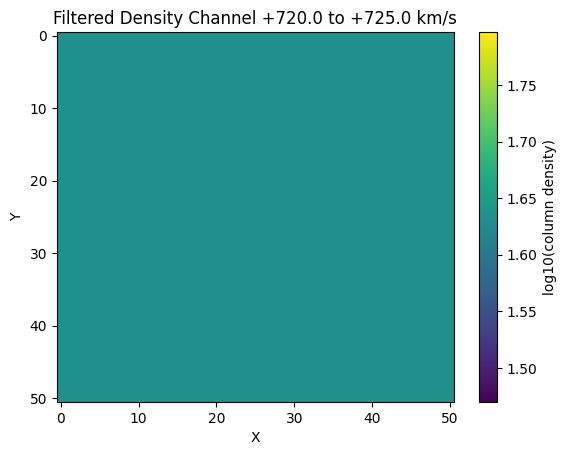

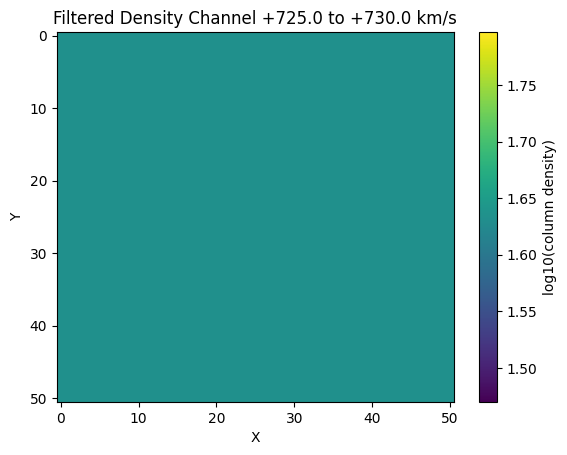

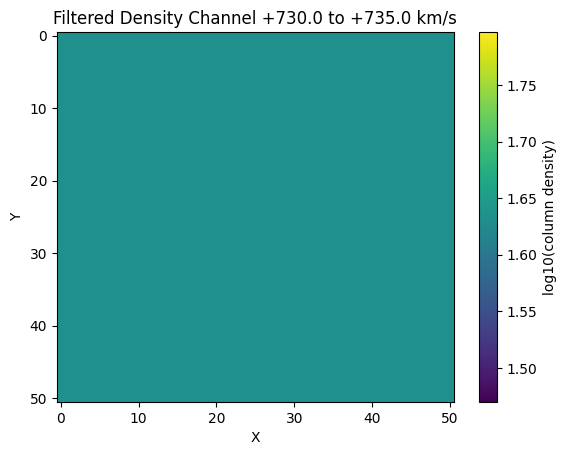

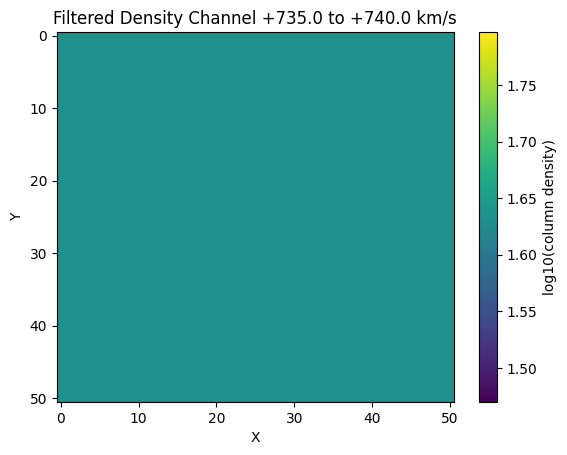

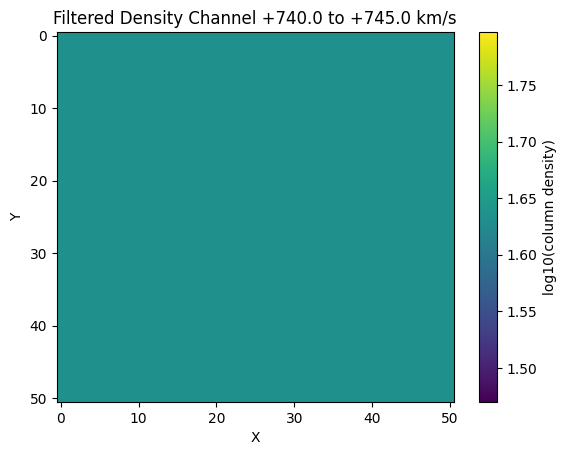

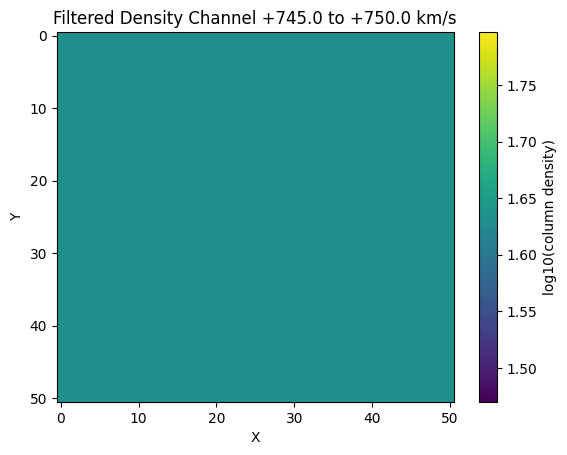

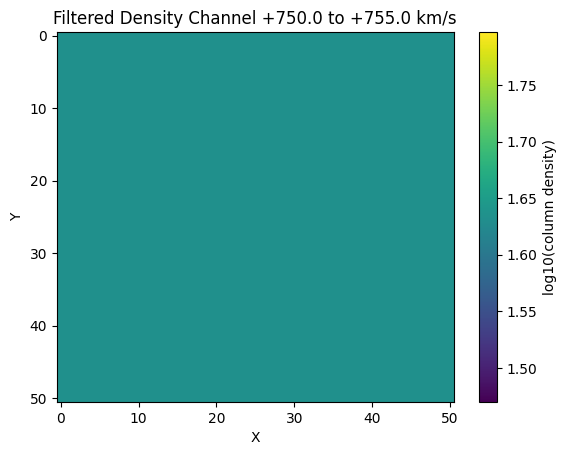

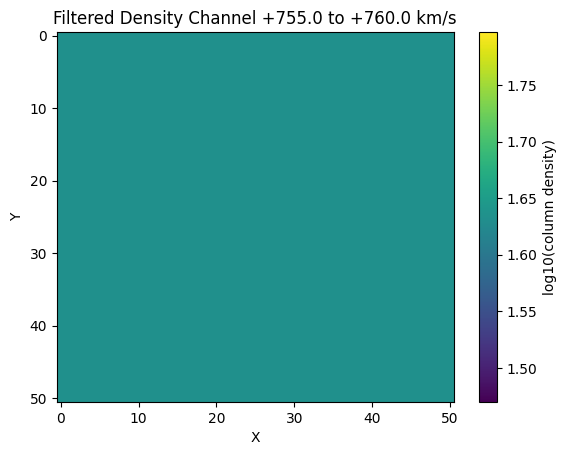

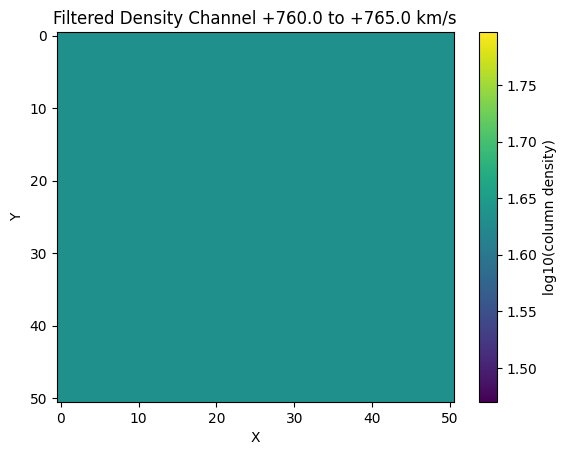

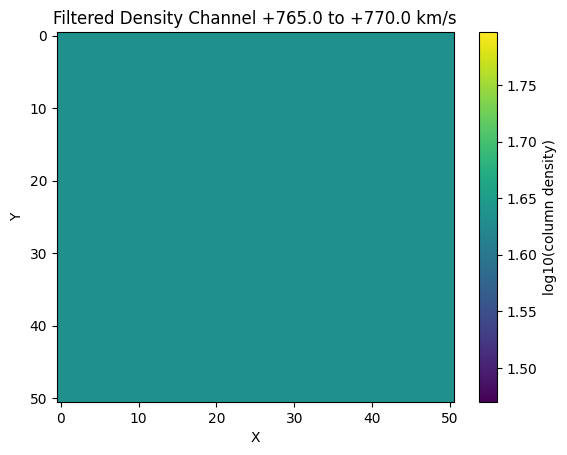

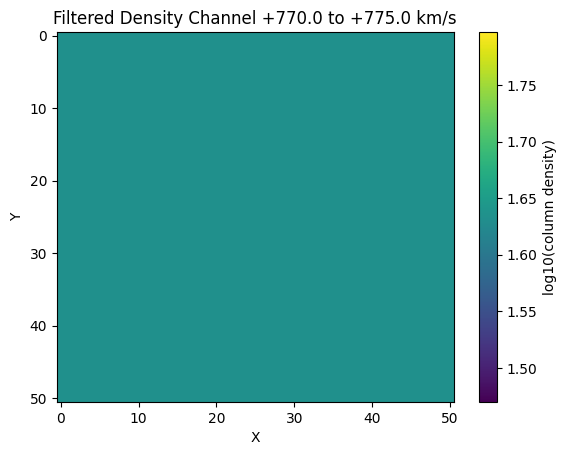

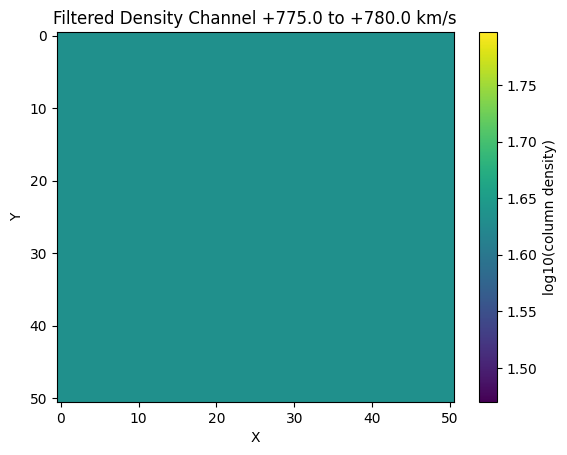

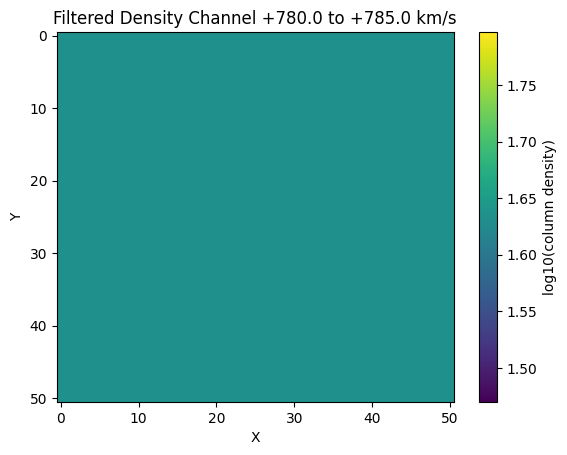

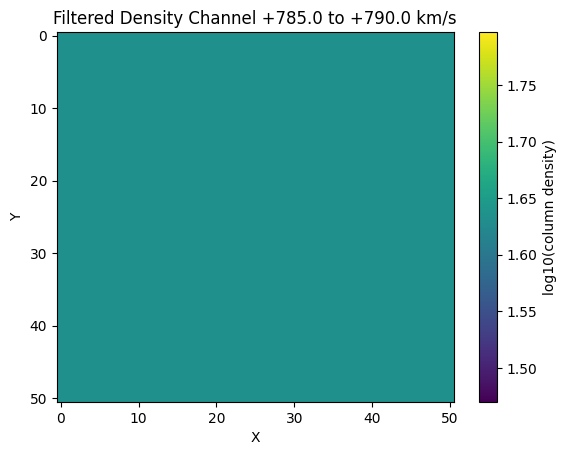

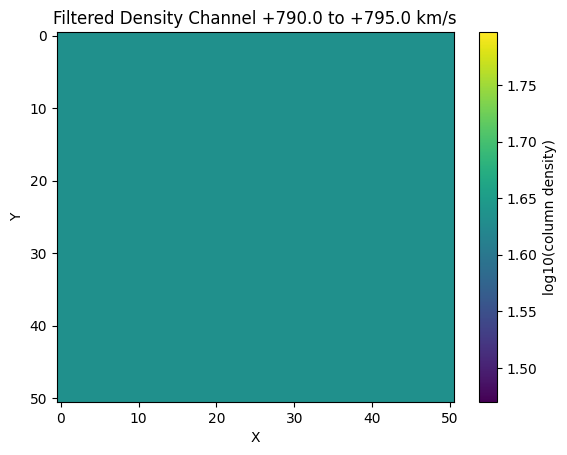

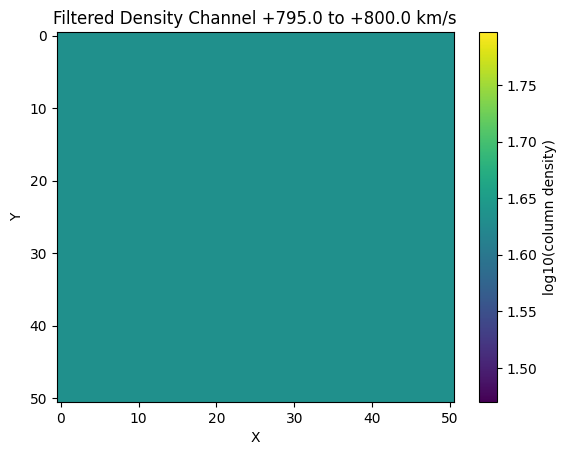

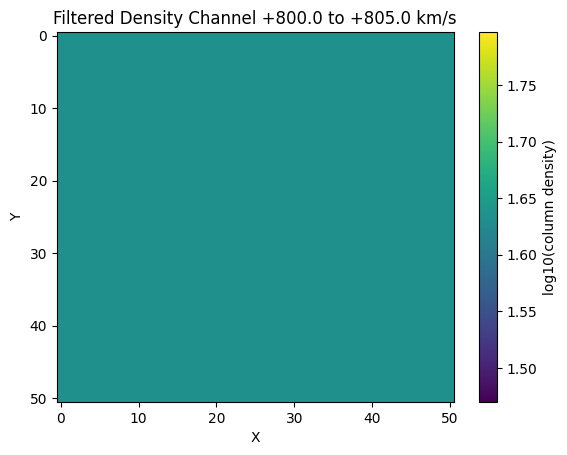

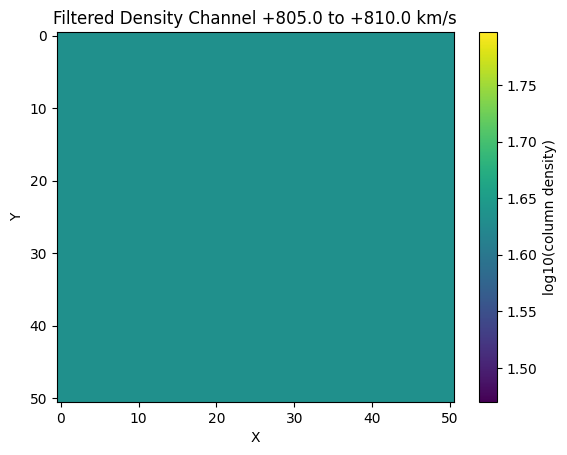

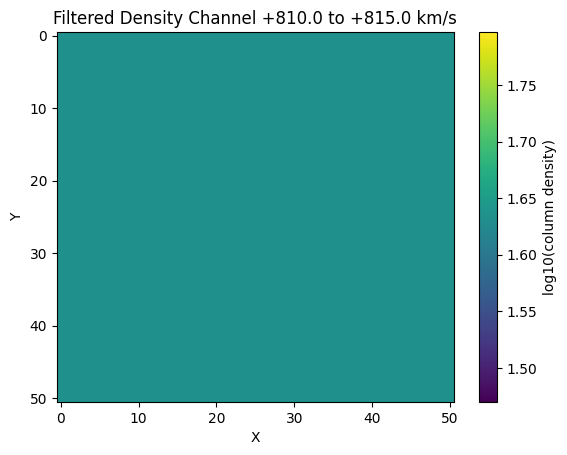

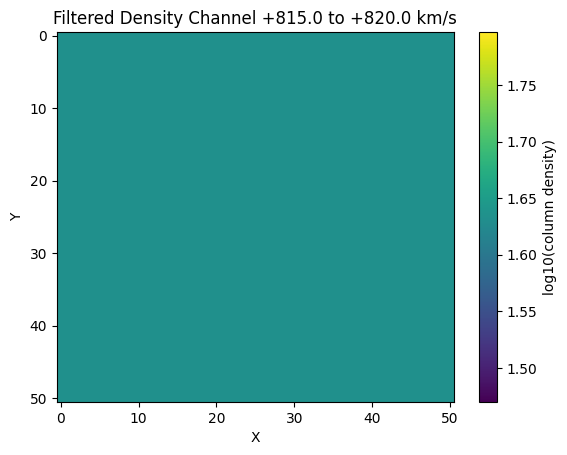

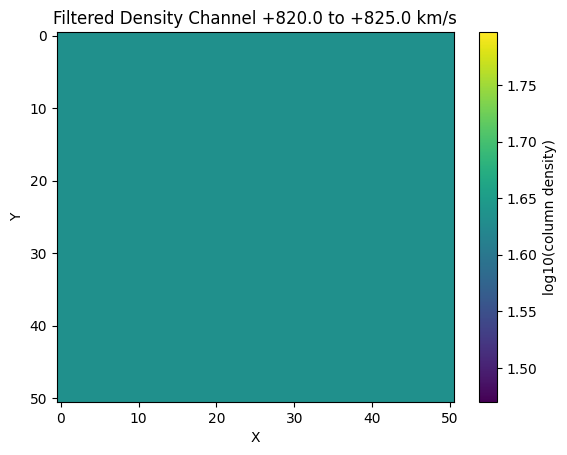

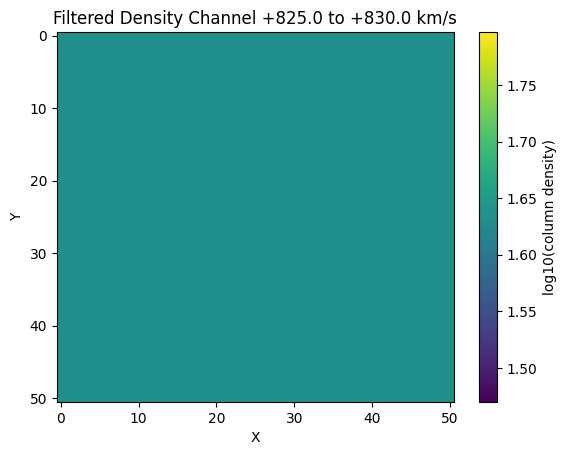

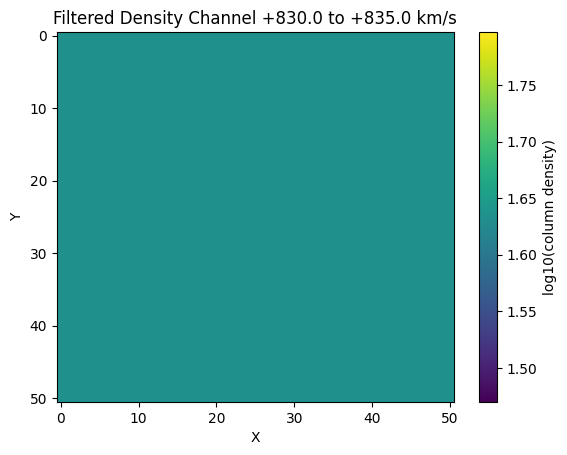

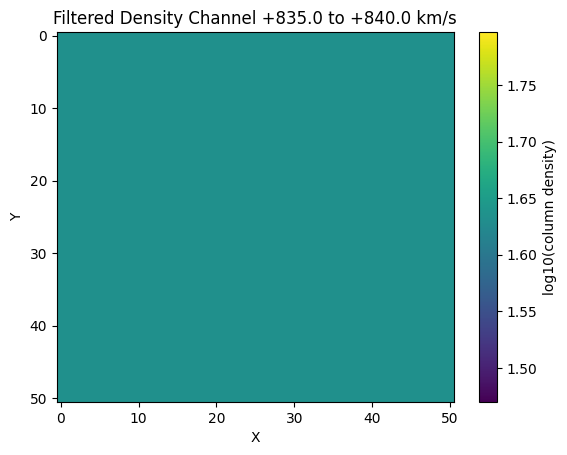

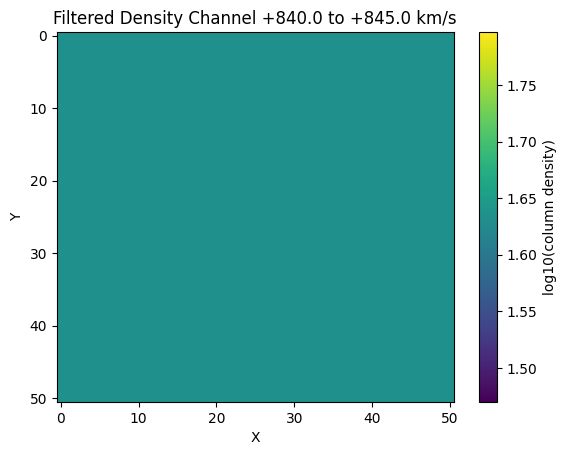

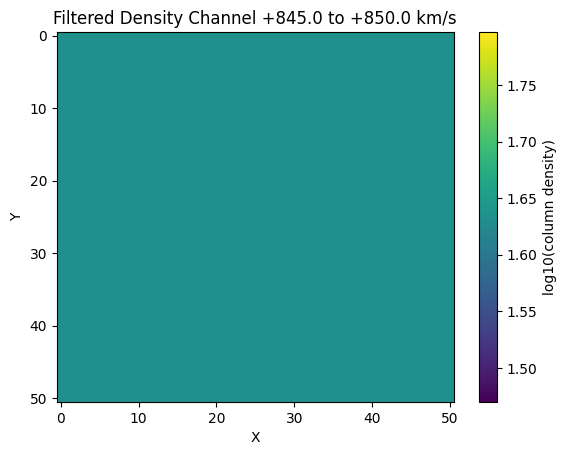

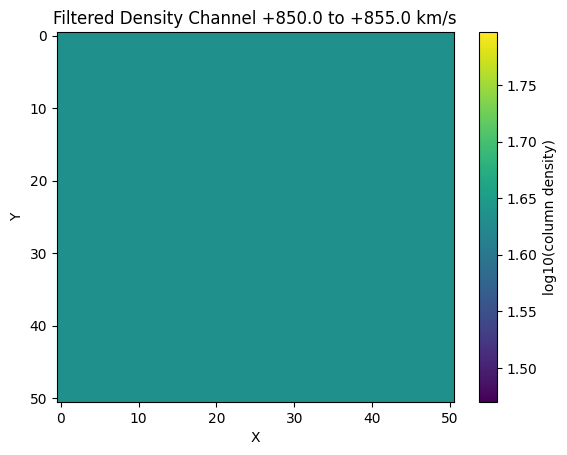

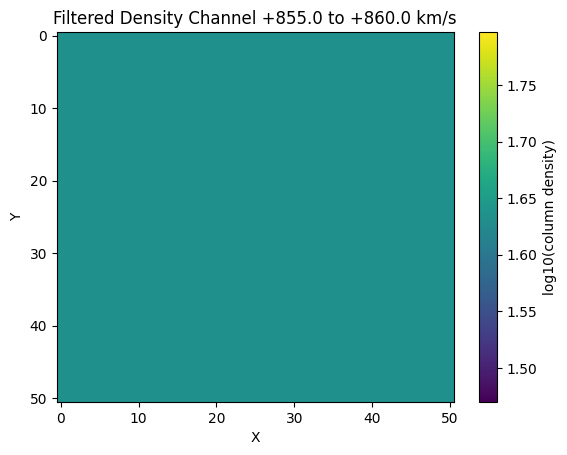

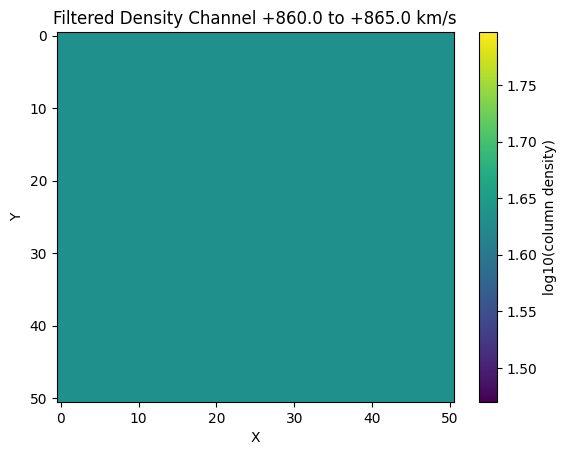

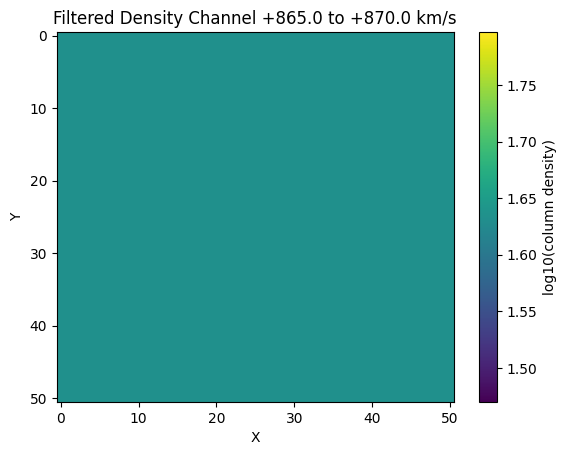

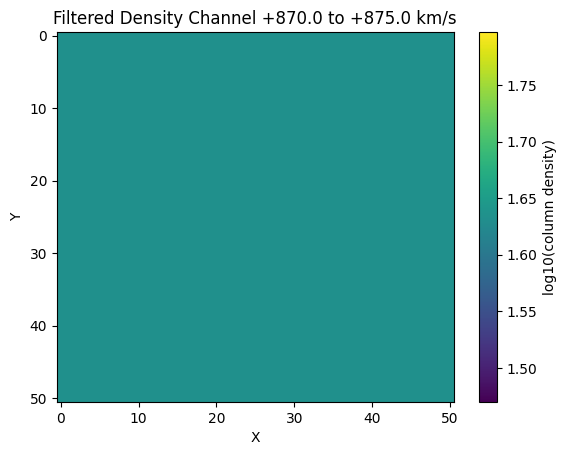

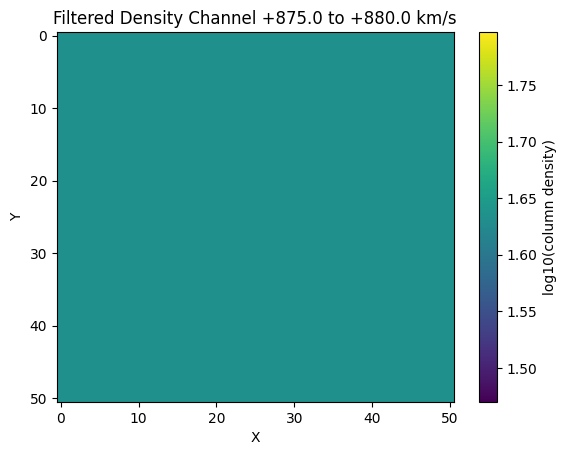

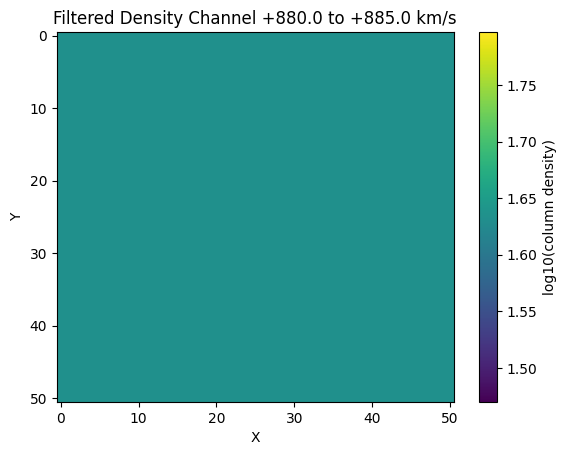

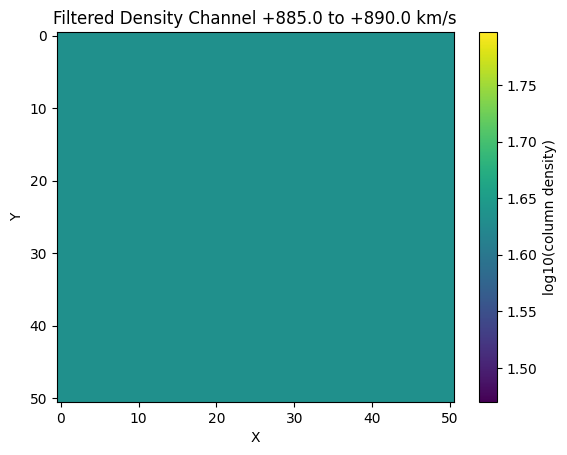

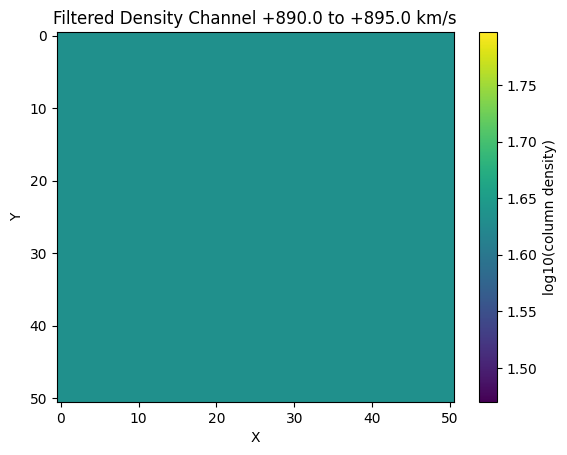

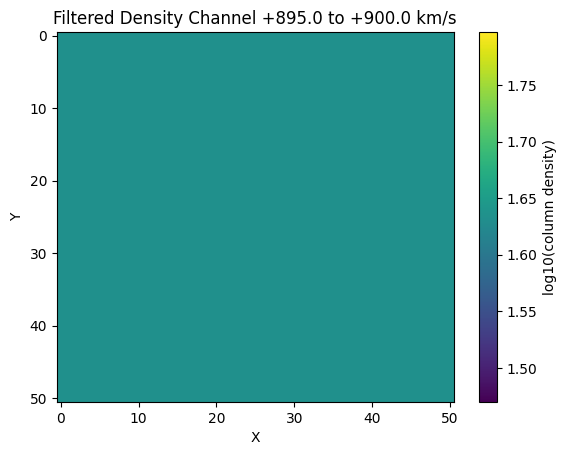

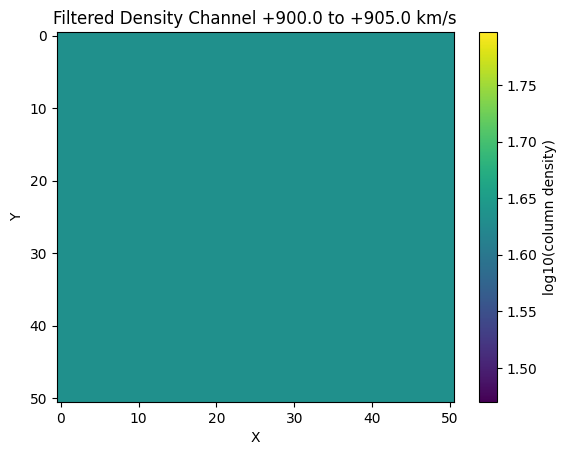

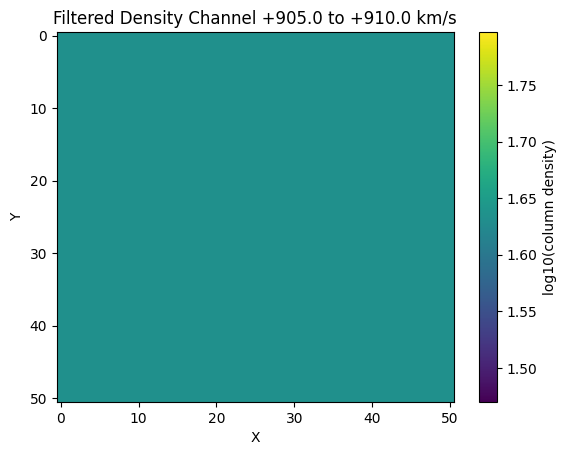

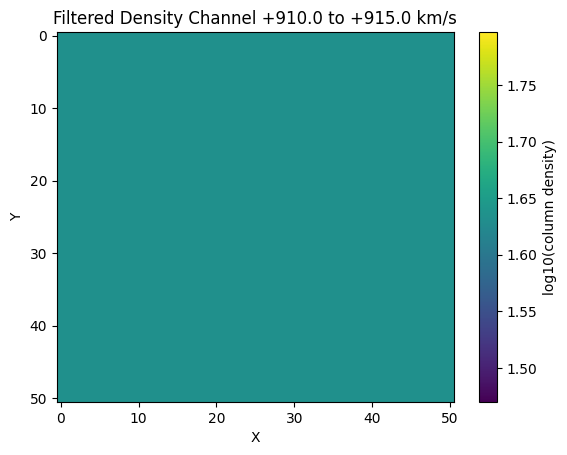

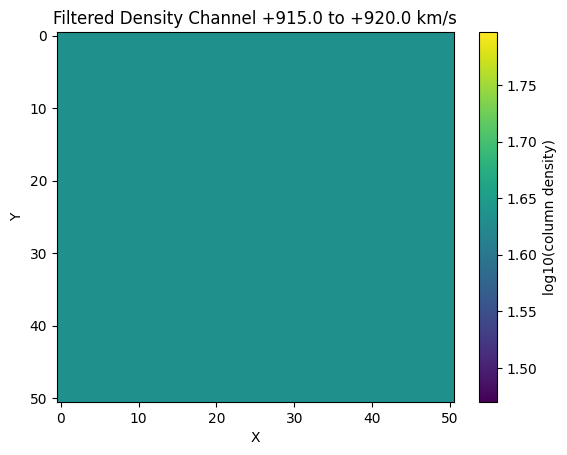

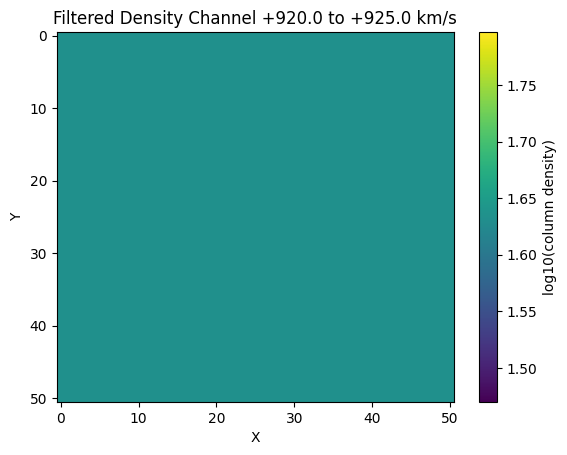

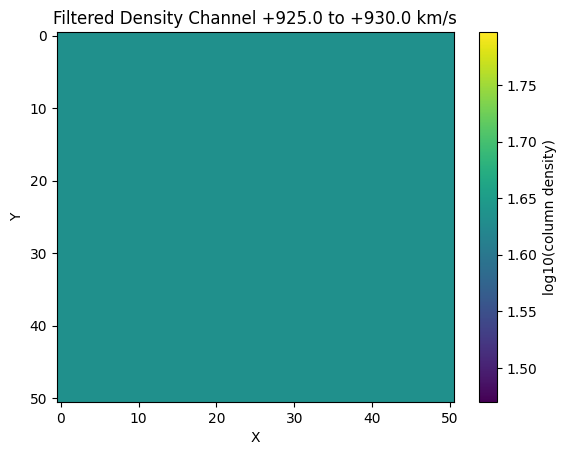

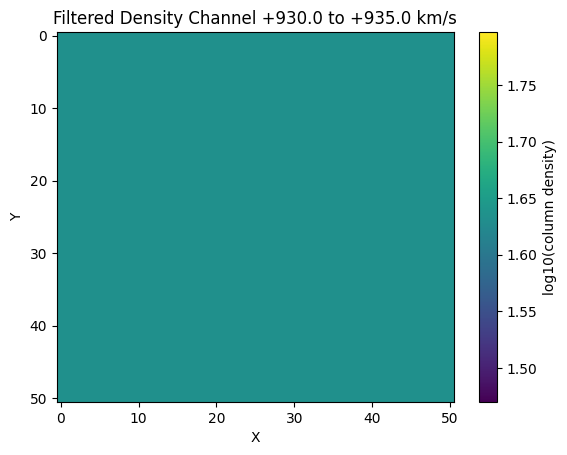

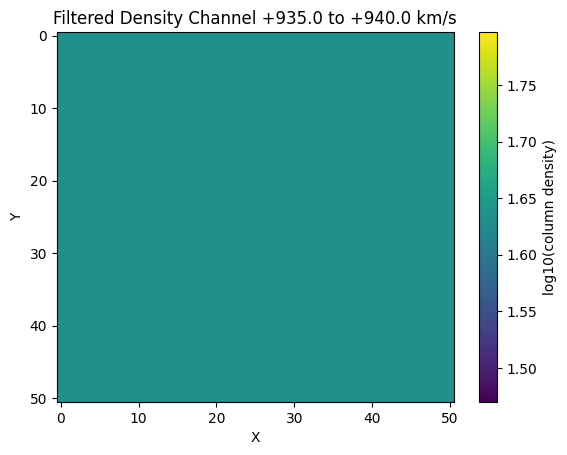

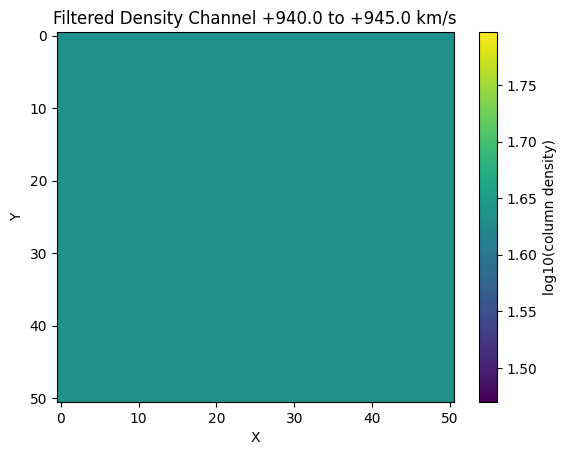

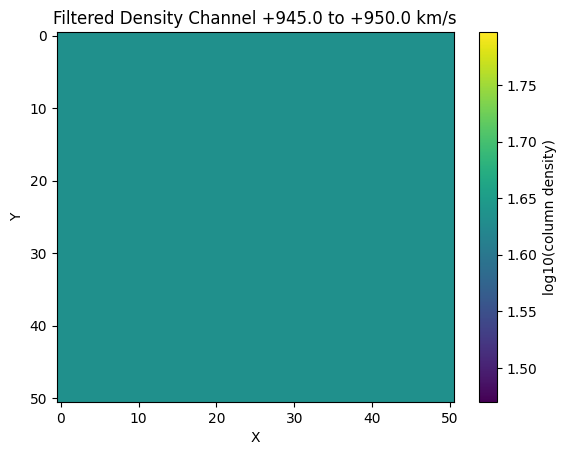

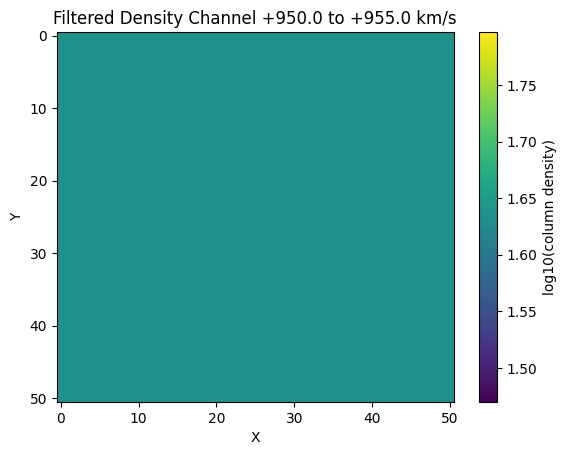

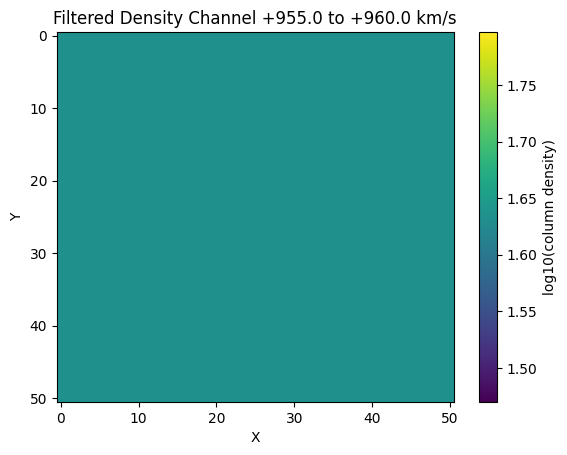

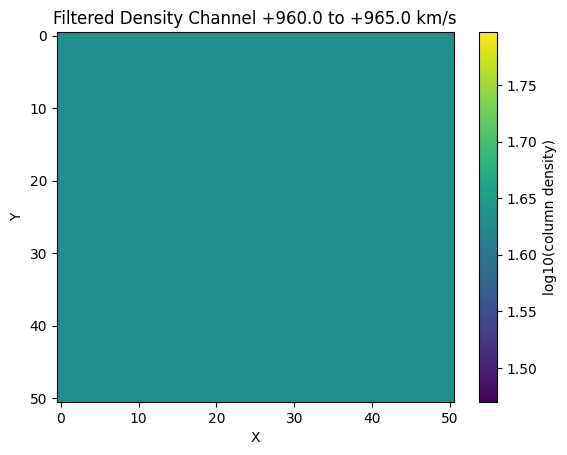

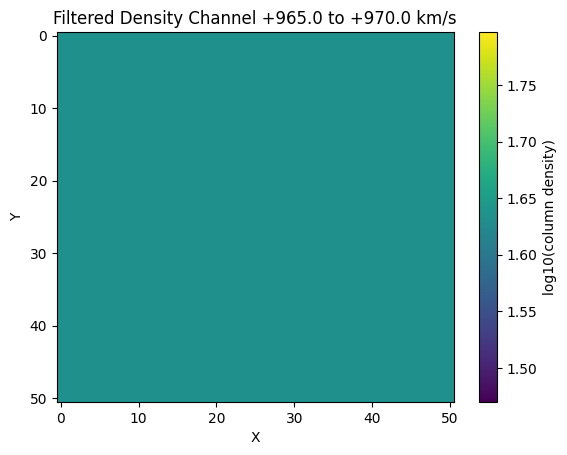

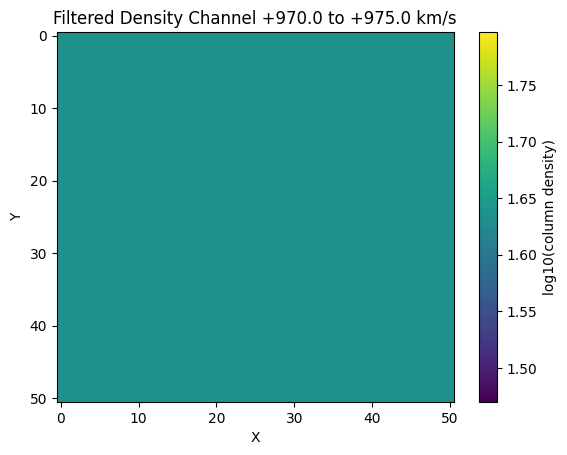

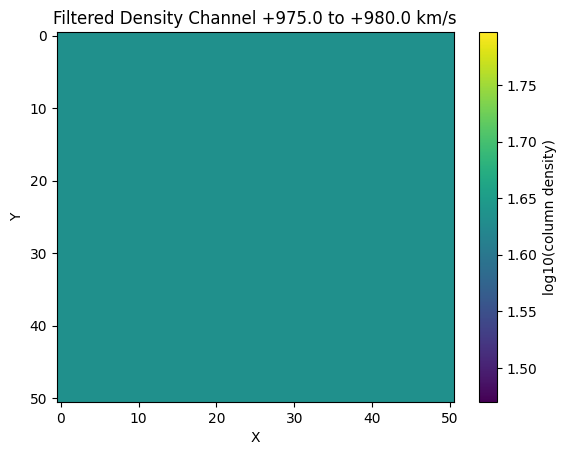

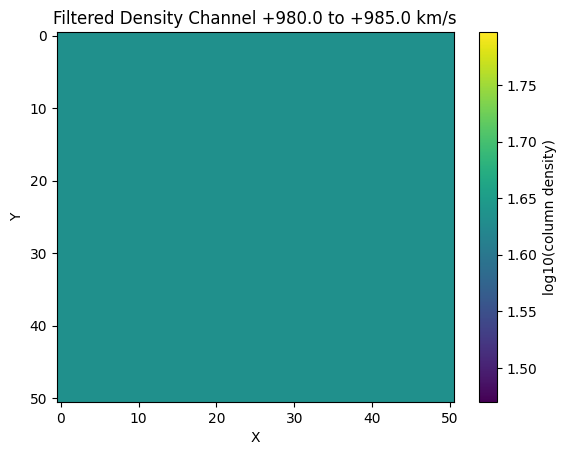

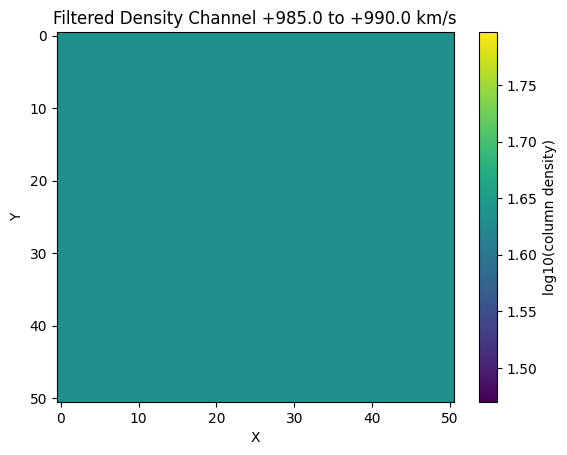

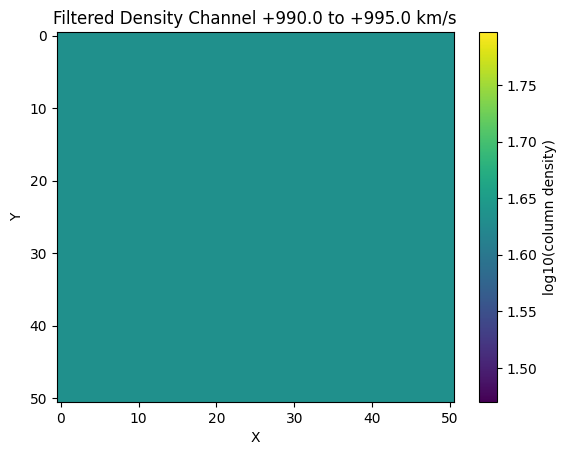

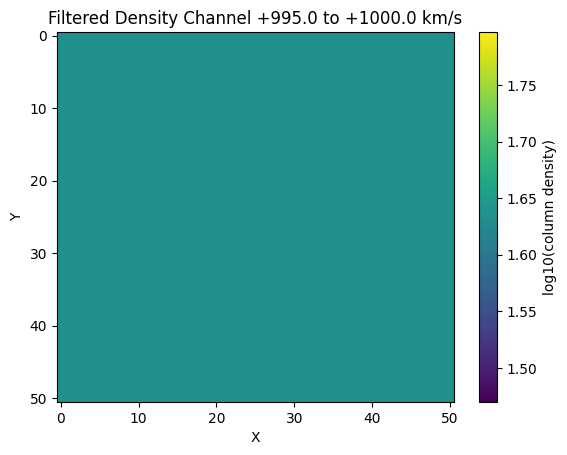

In [314]:
# Uniform increments
z_incr = 5
for v in range(-10, 1000, z_incr):
    velz_range = (v, v + z_incr) 
    mask = (velz_np >= velz_range[0]) & (velz_np <= velz_range[1])
    filtered_dens = np.where(mask, dens_np, 1) 
    mean_filtered_dens = np.sum(filtered_dens, axis=-1)

    # saving the channel maps
    fig, ax = plt.subplots()
    im = ax.imshow(np.log10(mean_filtered_dens.T[::-1]), cmap='viridis', aspect='auto')
    fig.colorbar(im, label='log10(column density)')
    plt.title('Filtered Density Channel {:+.1f} to {:+.1f} km/s'.format(velz_range[0], velz_range[1]))
    plt.xlabel('X')
    plt.ylabel('Y')
    fig.savefig(f'channel_maps/channel_image_{v}.png')
    

156

# Moment 1 Map

In [322]:
new_velz.shape, new_dens.shape

((51, 51, 43), (51, 51, 43))

In [327]:
moment_1 = np.sum(new_velz * new_dens, axis=-1) / np.sum(new_dens, axis=-1)
moment_1.shape

(51, 51)

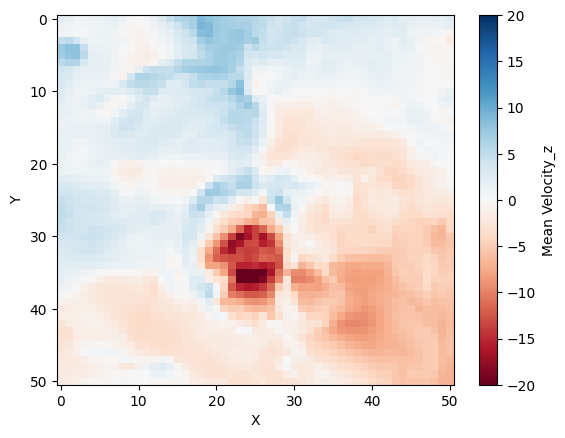

In [330]:
fig, ax = plt.subplots()
im = ax.imshow((moment_1.T[::-1]), cmap='RdBu', aspect='auto', vmin=-20,vmax=20)
fig.colorbar(im, label='Mean Velocity_z')
plt.xlabel('X')
plt.ylabel('Y')
# fig.savefig('channel_maps/moment_1_vz.png')
plt.show()

# Super bubble

In [25]:
import pandas as pd
import os

# convert seconds to Megayears
def seconds_to_megayears(seconds):
    return seconds / (1e6 * 365 * 24 * 3600)

def pc2pixel(coord, x_y_z):
    if x_y_z == "x":
        return coord + top_z
    elif x_y_z == "y":
        return top_z - coord
    elif x_y_z == "z":
        return coord + top_z
    return coord

def pixel2pc(coord, x_y_z):
    if x_y_z == "x":
        return coord - top_z
    elif x_y_z == "y":
        return top_z - coord
    elif x_y_z == "z":
        return coord - top_z
    return coord

def cm2pc(cm):
    return cm * 3.24077929e-19

# filter the DataFrame
def filter_data(df, range_coord):
    return df[(df['posx_pc'] > range_coord[0]) & (df['posx_pc'] < range_coord[0] + range_coord[2]) & (df['posy_pc'] > range_coord[1]) & (df['posy_pc'] < range_coord[1] + range_coord[3]) & (df['posz_pc'] > range_coord[4] & (df['posz_pc'] < range_coord[5]))]

def timestamp2Myr(timestamp):
    return (timestamp - 200) * 0.1 + 191

# List all .dat files in the current directory
# CV lab
dat_file_root = "/home/joy0921/Desktop/Dataset/SNfeedback"

# Compute2.idsl
# dat_file_root = "/home/joy0921/Desktop/Dataset/SNfeedback"

# Mac
# dat_file_root = "SNfeedback"

dat_files = ["SBfeedback.dat"]

# Initialize an empty DataFrame
all_data = pd.DataFrame()

# Read and concatenate data from all .dat files
for dat_file in dat_files:
    # Assuming space-separated values in the .dat files
    df = pd.read_csv(os.path.join(dat_file_root, dat_file), delim_whitespace=True, header=None,
                     names=['SBid', 'nSN', 'time', 'posx', 'posy', 'posz', 'velx', 'vely', 'velz'])
    
    # Convert the columns to numerical
    df = df.iloc[1:]
    df['nSN'] = df['nSN'].map(int)
    df['time'] = pd.to_numeric(df['time'],errors='coerce')
    df['posx'] = pd.to_numeric(df['posx'],errors='coerce')
    df['posy'] = pd.to_numeric(df['posy'],errors='coerce')
    df['posz'] = pd.to_numeric(df['posz'],errors='coerce')
    df = df.drop(['velx', 'vely', 'velz'], axis=1)
    all_data = pd.concat([all_data, df], ignore_index=True)
    # Convert time to Megayears
    all_data['time_Myr'] = seconds_to_megayears(all_data['time'])

    # Convert 'pos' from centimeters to parsecs
    all_data['posx_pc'] = cm2pc(all_data['posx'])
    all_data['posy_pc'] = cm2pc(all_data['posy'])
    all_data['posz_pc'] = cm2pc(all_data['posz'])

    # Sort the DataFrame by time in ascending order
    all_data.sort_values(by='time_Myr', inplace=True)

# all_data.head()

grouped_df = all_data.groupby('SBid')
grouped_df.get_group('250')




SBid  nSN          time          posx          posy          posz  \
4267  250    2  7.211849e+15 -6.420940e+20  6.001700e+20  3.969461e+20   
3438  250    2  7.211870e+15 -6.420940e+20  6.001700e+20  3.969461e+20   
4321  250    3  7.308940e+15 -6.420940e+20  6.001700e+20  3.969461e+20   
3493  250    3  7.308940e+15 -6.420940e+20  6.001700e+20  3.969461e+20   
4376  250    4  7.406037e+15 -6.420940e+20  6.001700e+20  3.969461e+20   
3549  250    4  7.406043e+15 -6.420940e+20  6.001700e+20  3.969461e+20   
4431  250    5  7.503140e+15 -6.420940e+20  6.001700e+20  3.969461e+20   
3607  250    5  7.503140e+15 -6.420940e+20  6.001700e+20  3.969461e+20   
4490  250    6  7.600233e+15 -6.420940e+20  6.001700e+20  3.969461e+20   
4605  250    6  7.600233e+15 -6.420940e+20  6.001700e+20  3.969461e+20   
3666  250    6  7.600233e+15 -6.420940e+20  6.001700e+20  3.969461e+20   
4660  250    7  7.697331e+15 -6.420940e+20  6.001700e+20  3.969461e+20   
4545  250    7  7.697331e+15 -6.420940e+20  6.001700e+20  3.969461e+20   
4721  250    8  7.794430e+15 -6.420940e+20  6.001700e+20  3.969461e+20   
4778  250    9  7.891528e+15 -6.420940e+20  6.001700e+20  3.969461e+20   
4836  250   10  7.988626e+15 -6.420940e+20  6.001700e+20  3.969461e+20   
4895  250   11  8.085724e+15 -6.420940e+20  6.001700e+20  3.969461e+20   
4951  250   12  8.182822e+15 -6.420940e+20  6.001700e+20  3.969461e+20   
5008  250   13  8.279921e+15 -6.420940e+20  6.001700e+20  3.969461e+20   

        time_Myr     posx_pc    posy_pc    posz_pc  
4267  228.686232 -208.088484  194.50186  128.64147  
3438  228.686888 -208.088484  194.50186  128.64147  
4321  231.764980 -208.088484  194.50186  128.64147  
3493  231.764980 -208.088484  194.50186  128.64147  
4376  234.843880 -208.088484  194.50186  128.64147  
3549  234.844077 -208.088484  194.50186  128.64147  
4431  237.922996 -208.088484  194.50186  128.64147  
3607  237.922996 -208.088484  194.50186  128.64147  
4490  241.001807 -208.088484  194.50186  128.64147  
4605  241.001807 -208.088484  194.50186  128.64147  
3666  241.001807 -208.088484  194.50186  128.64147  
4660  244.080774 -208.088484  194.50186  128.64147  
4545  244.080774 -208.088484  194.50186  128.64147  
4721  247.159738 -208.088484  194.50186  128.64147  
4778  250.238702 -208.088484  194.50186  128.64147  
4836  253.317669 -208.088484  194.50186  128.64147  
4895  256.396632 -208.088484  194.50186  128.64147  
4951  259.475596 -208.088484  194.50186  128.64147  
5008  262.554563 -208.088484  194.50186  128.64147

In [ ]:
# elephant
hdf5_root = "/srv/data/stratbox_simulations/stratbox_particle_runs/bx5/smd132/sn34/pe300/4pc_resume/4pc"

# s01.leaves
# hdf5_root = "/home/joy0921/Desktop/Dataset/hdf5_files"

ds = yt.load(os.path.join(hdf5_root, 'sn34_smd132_bx5_pe300_hdf5_plt_cnt_0206'))

center = [0, 0, 0] * yt.units.pc
arb_center = ds.arr(center, 'code_length')
xlim = 256
ylim = 256
zlim= 256
left_edge = arb_center + ds.quan(-500, 'pc')
right_edge = arb_center + ds.quan(500, 'pc')
obj = ds.arbitrary_grid(left_edge, right_edge, dims=(256,256,256))

In [ ]:
plt.imshow(np.log10(obj['flash', 'dens'][:, :, 104].T[::-1])) 
plt.gca().add_patch(Rectangle((-368 + 500, -(-382) + 500), 80, 90, linewidth=1, edgecolor='r', facecolor="none"))     
# plt.savefig("whole_grid.png")

In [ ]:
x_range, y_range, z_range = (pc2pixel(-428, x_y_z = 'x'), pc2pixel(-228, x_y_z = 'x')), (0, 200), (pc2pixel(-136, x_y_z = 'z'), pc2pixel(34, x_y_z = 'z'))

x_range, y_range, z_range 

# x_range, y_range, z_range = (-468, -188), (-572, -282), (-136, 34) #(-368, -288), (-418, -328), (-250, 250)  #(-136, 34) 

multiplier = 256 / 1000

# Multiply each element within the tuples by the multiplier
x_range_scaled = tuple(int(x * multiplier) for x in x_range)
y_range_scaled = tuple(int(y * multiplier) for y in y_range)
#z_range_scaled = z_range  
z_range_scaled = tuple(int(z * multiplier) for z in z_range)

new_velz, new_dens = get_velz_dens(x_range_scaled, y_range_scaled, z_range_scaled)

z = pc2pixel(-91, x_y_z='z') * 256 / 1000 - z_range_scaled[0]




In [ ]:
# velocity slice

fig, ax = plt.subplots()
im = ax.imshow((new_velz[:, :, 11].T[::-1]), cmap='RdBu', aspect='auto', vmin=-20,vmax=20)
fig.colorbar(im, label='Velocity')
plt.xlabel('X')
plt.ylabel('Y')
fig.savefig('channel_maps/velz_zoom_in_vzoom.png')
plt.show()

In [ ]:
# Density zoom in

fig, ax = plt.subplots()
im = ax.imshow(np.log10(new_dens[:, :, 11].T[::-1]), cmap='viridis', aspect='auto')
fig.colorbar(im, label='Density')
plt.title('Density Channel')
plt.xlabel('X')
plt.ylabel('Y')
fig.savefig('channel_maps/density_zoom_in.png')
plt.show()

In [ ]:
# Uniform increments
z_incr = 5
for v in range(-10, 1000, z_incr):
    velz_range = (v, v + z_incr) 
    mask = (velz_np >= velz_range[0]) & (velz_np <= velz_range[1])
    filtered_dens = np.where(mask, dens_np, 1) 
    mean_filtered_dens = np.sum(filtered_dens, axis=-1)

    # saving the channel maps
    fig, ax = plt.subplots()
    im = ax.imshow(np.log10(mean_filtered_dens.T[::-1]), cmap='viridis', aspect='auto')
    fig.colorbar(im, label='log10(column density)')
    plt.title('Filtered Density Channel {:+.1f} to {:+.1f} km/s'.format(velz_range[0], velz_range[1]))
    plt.xlabel('X')
    plt.ylabel('Y')
    fig.savefig(f'channel_maps/channel_image_{v}.png')
    

In [ ]:
# Moment 1 map
moment_1 = np.sum(new_velz * new_dens, axis=-1) / np.sum(new_dens, axis=-1)
moment_1.shape

fig, ax = plt.subplots()
im = ax.imshow((moment_1.T[::-1]), cmap='RdBu', aspect='auto', vmin=-20,vmax=20)
fig.colorbar(im, label='Mean Velocity_z')
plt.xlabel('X')
plt.ylabel('Y')
# fig.savefig('channel_maps/moment_1_vz.png')
plt.show()